<h2>IS453 Financial Analytics</h2>
<h2> G1 - Group 8 Code
<h2>Group Assignment</h2>


In [97]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pprint

# 1.0 Data Exploration

Import and examine the home equity loan dataset


In [98]:
def reduce_mem_usage(df):
    """iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))

    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True, index_col="SK_ID_CURR")
    df = reduce_mem_usage(df)
    return df

In [99]:
app_data = import_data("IS453 Group Assignment - Application Data.csv")
bureau_data = import_data("IS453 Group Assignment - Bureau Data.csv")

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 93.55 MB
Decreased by 67.3%
Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 119.49 MB
Decreased by 46.3%


In [100]:
bureau_data2 = bureau_data[
    [
        "DAYS_CREDIT",
        "CREDIT_DAY_OVERDUE",
        "AMT_CREDIT_MAX_OVERDUE",
        "CNT_CREDIT_PROLONG",
        "AMT_CREDIT_SUM_DEBT",
        "AMT_CREDIT_SUM_OVERDUE",
    ]
]
bureau_data2 = bureau_data2.groupby(bureau_data.index).mean()

## 1.1 Clean Data

Filter data, drop those are missing with more than 30% or more data


In [101]:
threshold = 0.3

app_data = app_data.loc[app_data.isnull().mean(axis=1) <= threshold]
app_data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


## 1.2 Data Mapping

In [102]:
# Filter by people who owns houses
filtered_data = app_data[app_data["NAME_HOUSING_TYPE"] == "House / apartment"]

# Filter out 'Unemployed', 'Student' and possibly 'Maternity leave'
filtered_data = filtered_data[
    ~filtered_data["NAME_INCOME_TYPE"].isin(
        ["Unemployed", "Student", "Maternity leave"]
    )
]

def pensioners(row):
    if row["DAYS_EMPLOYED"] > 0: return -1 * row["DAYS_EMPLOYED"]
    else: return row["DAYS_EMPLOYED"]
filtered_data["DAYS_EMPLOYED"] = filtered_data.apply(pensioners, axis=1)

# How we discover values available for a column. Based on the discovery we set default value to filtered data

# If the home is in an emergency state, it might need renovations or repairs urgently.
# If this value is not filled, we'll assume the home IS NOT in emergency state
filtered_data["EMERGENCYSTATE_MODE"].fillna("No", inplace=True)

# The age of the building or the apartment can be a good indicator. Older buildings/homes might need more renovation.
unique_values = filtered_data["YEARS_BUILD_AVG"].unique()

# We use median with respect to the full dataset to impute values
filtered_data["YEARS_BUILD_AVG"].fillna(
    app_data["YEARS_BUILD_AVG"].median(), inplace=True
)

#  The total area of the apartment. Bigger homes might have more areas that need renovation.
unique_values = filtered_data["TOTALAREA_MODE"].unique()
# We use median with respect to the full dataset to impute values
filtered_data["TOTALAREA_MODE"].fillna(
    app_data["TOTALAREA_MODE"].median(), inplace=True
)

# If they have a history of many credit inquiries in the past year,
# it might indicate financial activity or a willingness to take on debt, which could be for renovation.
unique_values = filtered_data["AMT_REQ_CREDIT_BUREAU_YEAR"].unique()
filtered_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0.0, inplace=True)

unique_values = filtered_data["AMT_REQ_CREDIT_BUREAU_QRT"].unique()
filtered_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0.0, inplace=True)

unique_values = filtered_data["AMT_REQ_CREDIT_BUREAU_MON"].unique()
filtered_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0.0, inplace=True)

unique_values = filtered_data["AMT_REQ_CREDIT_BUREAU_WEEK"].unique()
filtered_data["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0.0, inplace=True)

unique_values = filtered_data["AMT_REQ_CREDIT_BUREAU_DAY"].unique()
filtered_data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0.0, inplace=True)

unique_values = filtered_data["AMT_REQ_CREDIT_BUREAU_HOUR"].unique()
filtered_data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0.0, inplace=True)

# These could indicate unused or underutilized spaces which might be prime candidates for renovation.
unique_values = filtered_data["NONLIVINGAREA_AVG"].unique()
# We use average in respect to the full data list
median_non_living_area = app_data["NONLIVINGAREA_AVG"].median()
filtered_data["NONLIVINGAREA_AVG"].fillna(median_non_living_area, inplace=True)

# OBS_30_CNT_SOCIAL_CIRCLE:
# This represents the number of observations (or people) in the applicant's social surroundings
#  with observable 30 DPD (Days Past Due) default. In other words,
# it counts how many people in the applicant's social circle had payment difficulties
# (they were late on a payment) but eventually paid it within the last 30 days.

# DEF_30_CNT_SOCIAL_CIRCLE:
# This represents the number of defaults (or people) in the applicant's social surroundings
#  with default 30 DPD. This means it counts how many people in the applicant's social circle had serious
# payment issues (they did not pay their loan EMI) in the last 30 days.

unique_values = filtered_data["OBS_30_CNT_SOCIAL_CIRCLE"].unique()
filtered_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0.0, inplace=True)

unique_values = filtered_data["DEF_30_CNT_SOCIAL_CIRCLE"].unique()
filtered_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0.0, inplace=True)

unique_values = filtered_data["OBS_60_CNT_SOCIAL_CIRCLE"].unique()
filtered_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0.0, inplace=True)

unique_values = filtered_data["DEF_60_CNT_SOCIAL_CIRCLE"].unique()
filtered_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0.0, inplace=True)

cleaned_data = filtered_data.dropna(axis=1)
columns_to_drop = [
    "CODE_GENDER",
    "NAME_HOUSING_TYPE",
    "DAYS_ID_PUBLISH",
    "DAYS_REGISTRATION",
    "WEEKDAY_APPR_PROCESS_START",
    "FLAG_WORK_PHONE",
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7",
    "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9",
    "FLAG_DOCUMENT_10",
    "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_12",
    "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19",
    "FLAG_DOCUMENT_20",
    "FLAG_DOCUMENT_21",
    "FLAG_MOBIL",
    "FLAG_EMP_PHONE",
    "FLAG_CONT_MOBILE",
    "FLAG_PHONE",
    "FLAG_EMAIL",
    "REGION_RATING_CLIENT",
    "REGION_RATING_CLIENT_W_CITY",
    "HOUR_APPR_PROCESS_START",
    "REG_REGION_NOT_LIVE_REGION",
    "REG_REGION_NOT_WORK_REGION",
    "LIVE_REGION_NOT_WORK_REGION",
    "REG_CITY_NOT_LIVE_CITY",
    "REG_CITY_NOT_WORK_CITY",
    "LIVE_CITY_NOT_WORK_CITY",
]

# Drop the columns from the DataFrame
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

"""income_type_mapping= {'Working': 0, 'State servant': 1, 'Commercial associate':2, 'Pensioner':3,'Businessman':4}
loan_mapping = {'Cash loans': 0, 'Revolving loans': 1}
gender_mapping = {'F': 0, 'M': 1}
yes_no = {'Y': 1, 'N': 0}
yes_no_full = {'Yes': 1, 'No': 0}
education_mapping = {'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher' : 2, 'Lower secondary' : 3, 'Academic degree' : 4}
family_status_mapping = {'Single / not married': 0, 'Married': 1, 'Civil marriage' : 2, 'Widow' : 3, 'Separated': 4, 'Unknown':5}
"""

org_mapping = {
    "Business Entity Type 3": "Business",
    "School": "Education",
    "Government": "Government",
    "Religion": "Religion",
    "Other": "Other",
    "XNA": "XNA",
    "Electricity": "Electricity",
    "Medicine": "Medicine",
    "Business Entity Type 2": "Business",
    "Self-employed": "Self-employed",
    "Transport: type 2": "Transport",
    "Construction": "Construction",
    "Housing": "Housing",
    "Kindergarten": "Education",
    "Trade: type 7": "Trade",
    "Industry: type 11": "Industry",
    "Military": "Security",
    "Services": "Services",
    "Security Ministries": "Security",
    "Transport: type 4": "Transport",
    "Industry: type 1": "Industry",
    "Emergency": "Emergency",
    "Security": "Security",
    "University": "Education",
    "Transport: type 3": "Transport",
    "Police": "Security",
    "Business Entity Type 1": "Business",
    "Postal": "Postal",
    "Agriculture": "Agriculture",
    "Restaurant": "Restaurant",
    "Trade: type 2": "Trade",
    "Culture": "Culture",
    "Hotel": "Hotel",
    "Industry: type 7": "Industry",
    "Industry: type 3": "Industry",
    "Trade: type 3": "Trade",
    "Bank": "Bank",
    "Industry: type 9": "Industry",
    "Insurance": "Insurance",
    "Trade: type 6": "Trade",
    "Industry: type 2": "Industry",
    "Transport: type 1": "Transport",
    "Industry: type 12": "Industry",
    "Industry: type 4": "Industry",
    "Mobile": "Telecom",
    "Trade: type 1": "Trade",
    "Industry: type 5": "Industry",
    "Industry: type 10": "Industry",
    "Legal Services": "Legal",
    "Advertising": "Advertising",
    "Trade: type 5": "Trade",
    "Industry: type 13": "Industry",
    "Trade: type 4": "Trade",
    "Telecom": "Telecom",
    "Industry: type 8": "Industry",
    "Realtor": "Housing",
    "Cleaning": "Cleaning",
    "Industry: type 6": "Industry",
}

"""
cleaned_data['NAME_FAMILY_STATUS'] = cleaned_data['NAME_FAMILY_STATUS'].map(family_status_mapping)
cleaned_data['NAME_EDUCATION_TYPE'] = cleaned_data['NAME_EDUCATION_TYPE'].map(education_mapping)
cleaned_data['NAME_INCOME_TYPE'] = cleaned_data['NAME_INCOME_TYPE'].map(income_type_mapping)
cleaned_data['NAME_CONTRACT_TYPE'] = cleaned_data['NAME_CONTRACT_TYPE'].map(loan_mapping)
cleaned_data['CODE_GENDER'] = cleaned_data['CODE_GENDER'].map(gender_mapping)
cleaned_data['FLAG_OWN_CAR'] = cleaned_data['FLAG_OWN_CAR'].map(yes_no)
cleaned_data['FLAG_OWN_REALTY'] = cleaned_data['FLAG_OWN_REALTY'].map(yes_no)
cleaned_data['EMERGENCYSTATE_MODE'] = cleaned_data['EMERGENCYSTATE_MODE'].map(yes_no_full)"""

cleaned_data["ORGANIZATION_TYPE"] = cleaned_data["ORGANIZATION_TYPE"].map(org_mapping)
cleaned_data

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100016,0,Cash loans,N,Y,0,67500.0,80865.0,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100017,0,Cash loans,Y,N,1,225000.0,918468.0,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100018,0,Cash loans,N,Y,0,189000.0,773680.5,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,0,Cash loans,N,Y,0,112500.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
456252,0,Cash loans,N,Y,0,72000.0,269550.0,Pensioner,Secondary / secondary special,Widow,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456253,0,Cash loans,N,Y,0,153000.0,677664.0,Working,Higher education,Separated,...,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


## 1.3 Finding Correlation

Finding Correlation between columns


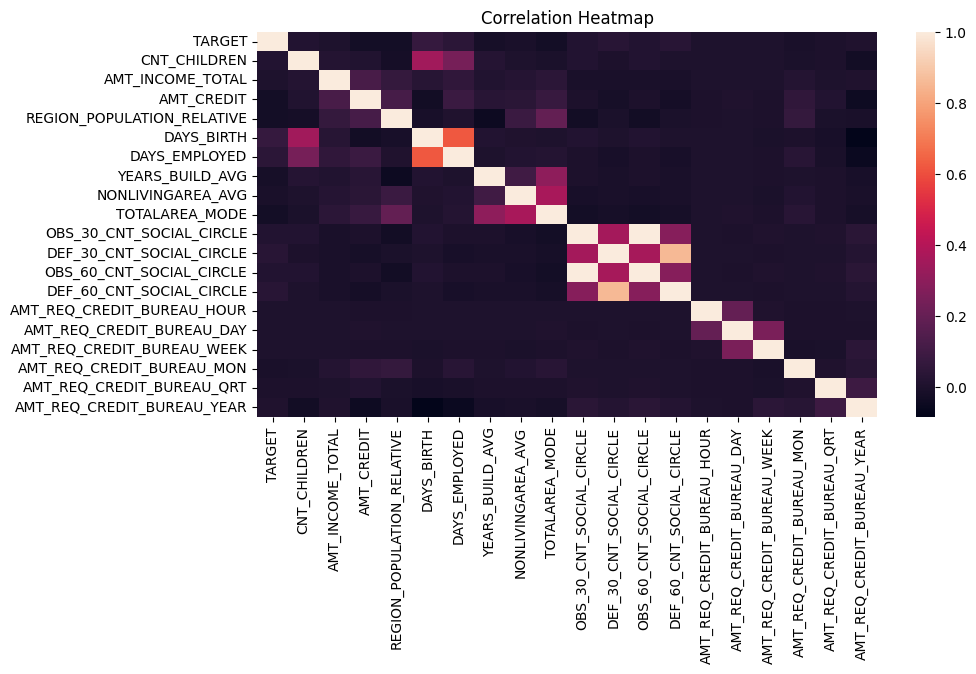


Correlations within AMT_REQ_CREDIT_BUREAU variables:
('AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY') : 0.19758047026566075
('AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK') : 0.007722792810624484
('AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON') : -0.0006348856233536686
('AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT') : -0.0009890408489291885
('AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_YEAR') : 0.0022560745235977284
('AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK') : 0.252742938921675
('AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON') : -0.0047786671854928705
('AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_QRT') : -0.002155351300013856
('AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_YEAR') : -0.0009453423891272843
('AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON') : -0.00956860669390227
('AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT') : -0.00666640747221213
('AMT_REQ_CREDIT_BUREAU_WEE

In [103]:
# print(cleaned_data.columns)
# print(cleaned_data.dtypes)

corr_matrix = cleaned_data.corr(numeric_only=True)
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix)
plt.title("Correlation Heatmap")
plt.show()

# Strong Correlations with TARGET:
# Since TARGET might be your outcome variable (depending on your problem definition),
# any variable with a visibly strong color (either blue or red) in the TARGET row/column
# could be important. This is because they might have a direct impact on the outcome.

# AMT_REQ_CREDIT_BUREAU Variables: There are several AMT_REQ_CREDIT_BUREAU_...
# variables which seem to correlate with one another. It might be worth
# exploring these further to understand the significance of their relationship.

# 2. Correlations within the AMT_REQ_CREDIT_BUREAU variables
amt_req_vars = [col for col in cleaned_data.columns if "AMT_REQ_CREDIT_BUREAU" in col]
amt_req_corrs = cleaned_data[amt_req_vars].corr(numeric_only=True)

# To get the specific pairs and their correlation values:
amt_req_pairs = {}
for i in range(len(amt_req_vars)):
    for j in range(i + 1, len(amt_req_vars)):
        amt_req_pairs[(amt_req_vars[i], amt_req_vars[j])] = amt_req_corrs.loc[
            amt_req_vars[i], amt_req_vars[j]
        ]

# 3. Correlation of other variables with TARGET
target_corrs = cleaned_data.corrwith(cleaned_data["TARGET"], numeric_only=True).drop(
    "TARGET"
)

# Now, you can print or further analyze the correlation values
print("\nCorrelations within AMT_REQ_CREDIT_BUREAU variables:")
for pair, corr_value in amt_req_pairs.items():
    print(pair, ":", corr_value)
print("\nCorrelations with TARGET:")
print(target_corrs)

Recommendation:

For AMT_REQ_CREDIT_BUREAU variables: Focus on the pairs ('AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY'), ('AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK'), and ('AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR').

For correlations with TARGET: The variables DAYS_BIRTH, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, REGION_POPULATION_RELATIVE, DEF_30_CNT_SOCIAL_CIRCLE, and DEF_60_CNT_SOCIAL_CIRCLE should be explored further for potential predictive power.


## 1.4 Data Exploration

<Axes: xlabel='REGION_POPULATION_RELATIVE', ylabel='Density'>

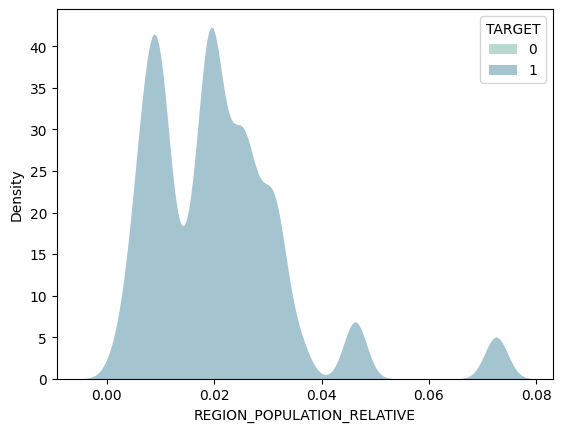

In [104]:
sns.kdeplot(data=cleaned_data, x='REGION_POPULATION_RELATIVE', hue='TARGET',fill=True, common_norm=False, palette="crest",alpha=.4, linewidth=0)

## 1.5 Remove irrelevant columns

In [105]:
# Based on the above we shall remove irrelvant columns
columns_to_remove = [
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "EMERGENCYSTATE_MODE",
]

# Remove the columns from the DataFrame
cleaned_data = cleaned_data.drop(columns=columns_to_remove)

## 1.6 Identifying Skewness


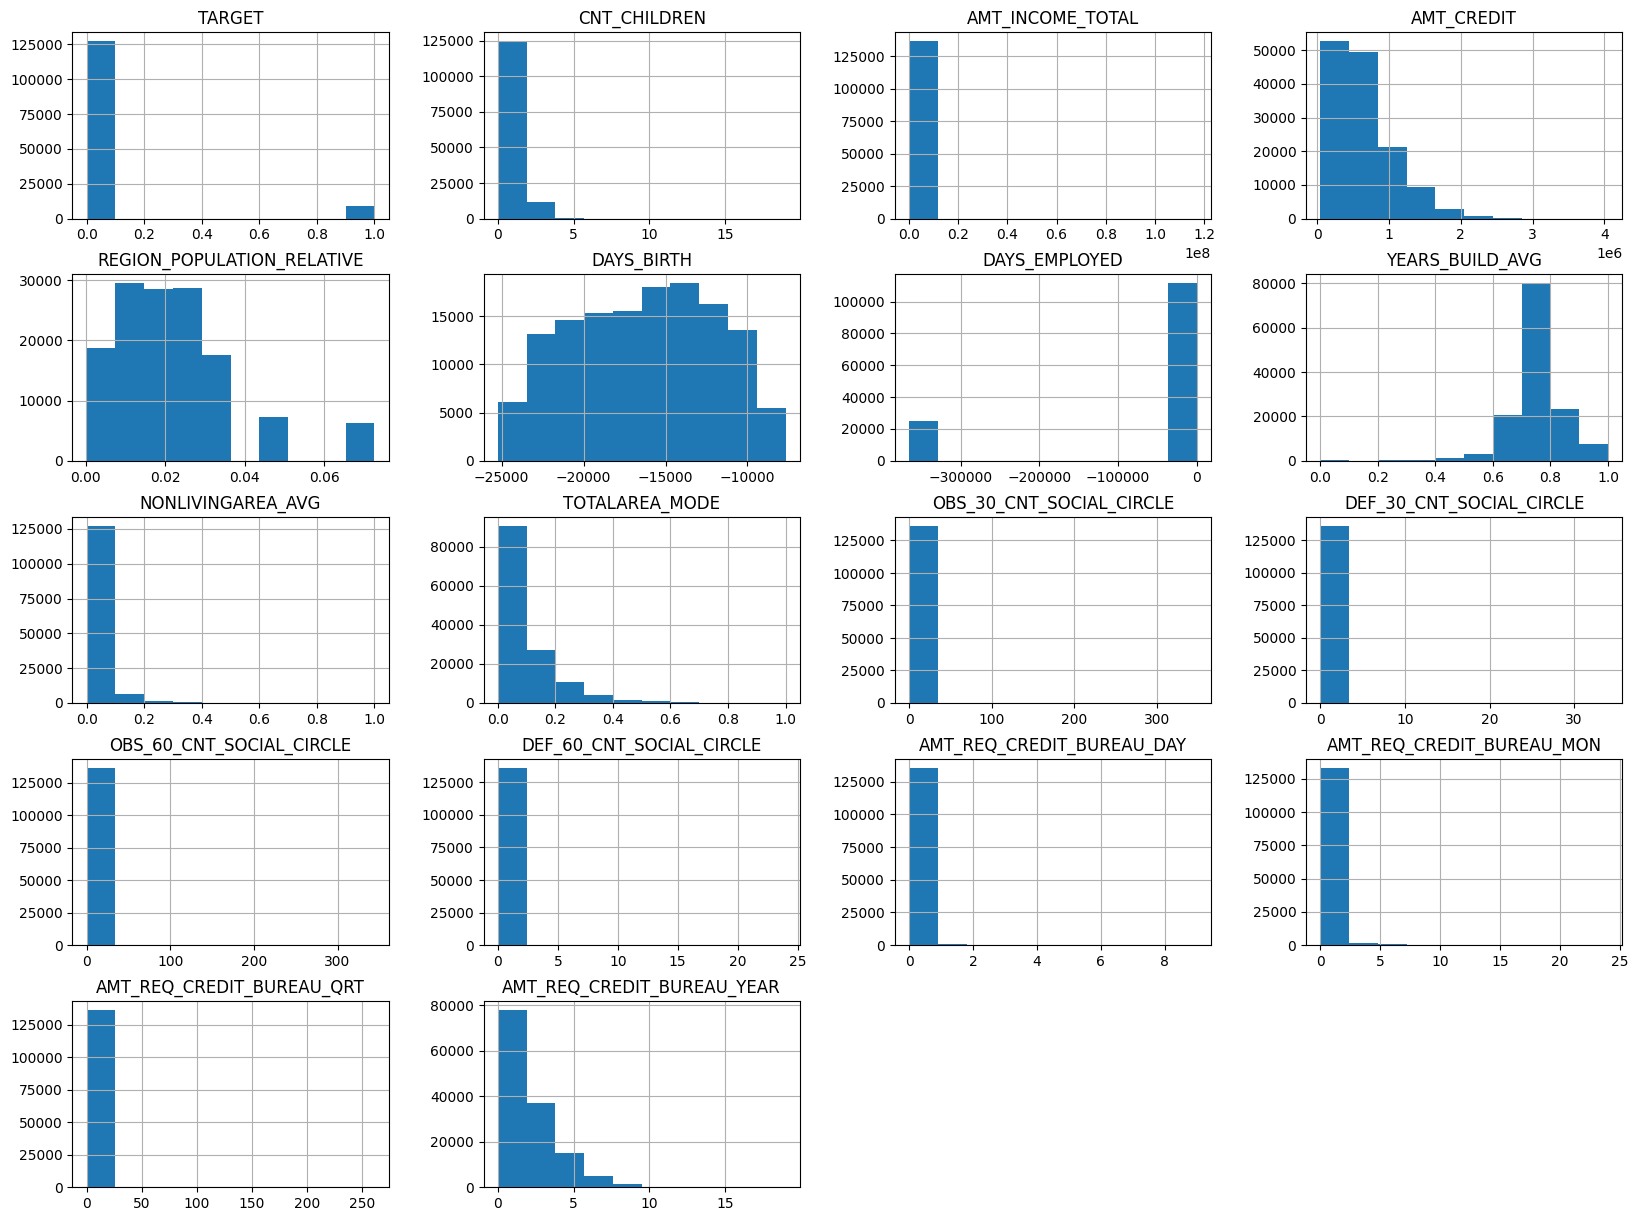

In [106]:
cleaned_data.hist(figsize=(20, 15))
plt.show()

# 2.0 Data Preparation

Join application dataset with bureau dataset


## 2.1 Log Transformation for AMT_INCOME_TOTAL

- It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.

- In most of the cases the magnitude order of the data changes within the range of the data.

- It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.


In [107]:
import numpy as np

cleaned_data["AMT_INCOME_TOTAL_LOGTRANS"] = (
    cleaned_data["AMT_INCOME_TOTAL"] + 1
).transform(np.log)
cleaned_data

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_LOGTRANS
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,...,0.014900,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,12.218500
100003,0,Cash loans,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,...,0.071411,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.506181
100016,0,Cash loans,N,Y,0,67500.0,80865.0,Working,Secondary / secondary special,Married,...,0.061188,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.119898
100017,0,Cash loans,Y,N,1,225000.0,918468.0,Working,Secondary / secondary special,Married,...,0.141724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.323860
100018,0,Cash loans,N,Y,0,189000.0,773680.5,Working,Secondary / secondary special,Married,...,0.381104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.149508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,0,Cash loans,N,Y,0,112500.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,...,0.260986,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,11.630717
456252,0,Cash loans,N,Y,0,72000.0,269550.0,Pensioner,Secondary / secondary special,Widow,...,0.021393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.184435
456253,0,Cash loans,N,Y,0,153000.0,677664.0,Working,Higher education,Separated,...,0.796875,6.0,0.0,6.0,0.0,0.0,1.0,0.0,1.0,11.938200


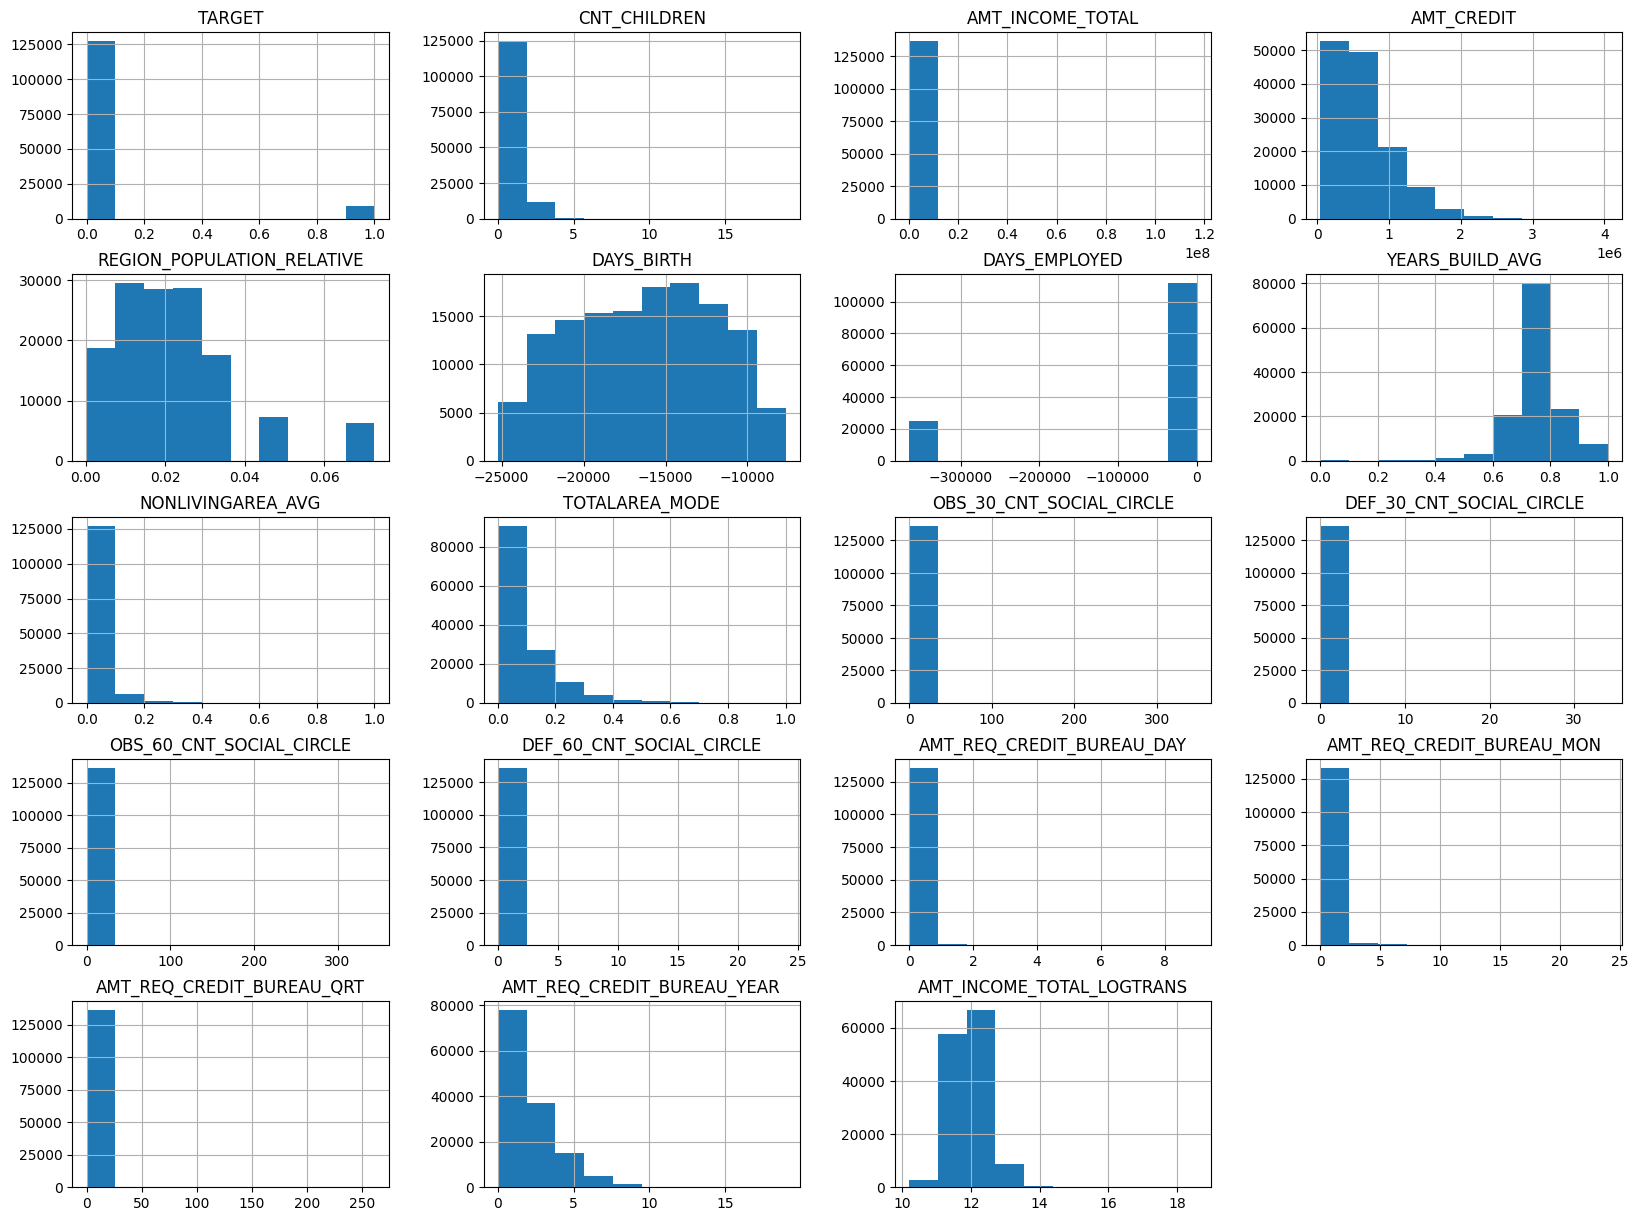

In [108]:
cleaned_data.hist(figsize=(20, 15))
plt.show()

In [109]:
final_data = cleaned_data.join(bureau_data2)
final_data

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_LOGTRANS,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,...,0.0,0.0,1.0,12.218500,-874.000000,0.0,1681.028931,0.000000,49156.199219,0.0
100003,0,Cash loans,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,...,0.0,0.0,0.0,12.506181,-1400.750000,0.0,0.000000,0.000000,0.000000,0.0
100016,0,Cash loans,N,Y,0,67500.0,80865.0,Working,Secondary / secondary special,Married,...,1.0,0.0,0.0,11.119898,-618.428571,0.0,0.000000,0.000000,12744.900391,0.0
100017,0,Cash loans,Y,N,1,225000.0,918468.0,Working,Secondary / secondary special,Married,...,0.0,0.0,1.0,12.323860,-1944.333333,0.0,0.000000,0.000000,0.000000,0.0
100018,0,Cash loans,N,Y,0,189000.0,773680.5,Working,Secondary / secondary special,Married,...,0.0,0.0,0.0,12.149508,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,0,Cash loans,N,Y,0,112500.0,225000.0,Pensioner,Secondary / secondary special,Single / not married,...,2.0,0.0,0.0,11.630717,-1667.076923,0.0,6147.000000,0.000000,16307.099609,0.0
456252,0,Cash loans,N,Y,0,72000.0,269550.0,Pensioner,Secondary / secondary special,Widow,...,0.0,0.0,0.0,11.184435,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,N,Y,0,153000.0,677664.0,Working,Higher education,Separated,...,1.0,0.0,1.0,11.938200,-867.500000,0.0,NaN,0.000000,448958.250000,0.0


# 3.0 Grouping and Screening


## 3.1 Generate the WOE bins


In [110]:
bins = sc.woebin(final_data, y="TARGET")

# make it easy to read the bins
for variables, bindetails in bins.items():
    print(variables, " : ")
    display(bindetails)
    print("--" * 50)

[INFO] creating woe binning ...
DAYS_BIRTH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_BIRTH,"[-inf,-19500.0)",38130,0.279255,36400,1730,0.045371,-0.417258,0.040685,0.073837,-19500.0,False
1,DAYS_BIRTH,"[-19500.0,-13500.0)",57515,0.421226,53689,3826,0.066522,-0.012199,0.000062,0.073837,-13500.0,False
2,DAYS_BIRTH,"[-13500.0,-11500.0)",18897,0.138397,17352,1545,0.081759,0.210505,0.006720,0.073837,-11500.0,False
3,DAYS_BIRTH,"[-11500.0,inf)",22000,0.161123,19914,2086,0.094818,0.373014,0.026370,0.073837,inf,False


----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_CHILDREN,"[-inf,1.0)",97241,0.712169,90942,6299,0.064777,-0.040642,0.001156,0.003976,1.0,False
1,CNT_CHILDREN,"[1.0,2.0)",27382,0.200539,25345,2037,0.074392,0.108086,0.002455,0.003976,2.0,False
2,CNT_CHILDREN,"[2.0,inf)",11919,0.087292,11068,851,0.071399,0.063788,0.000365,0.003976,inf,False


----------------------------------------------------------------------------------------------------
DAYS_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_CREDIT,missing,17427,0.127631,15991,1436,0.082401,0.219024,0.006734,0.108955,missing,True
1,DAYS_CREDIT,"[-inf,-1300.0)",42294,0.309751,40401,1893,0.044758,-0.431503,0.047974,0.108955,-1300.0,False
2,DAYS_CREDIT,"[-1300.0,-900.0)",32739,0.239772,30811,1928,0.058890,-0.142200,0.004560,0.108955,-900.0,False
3,DAYS_CREDIT,"[-900.0,-650.0)",17847,0.130707,16534,1313,0.073570,0.096085,0.001258,0.108955,-650.0,False
4,DAYS_CREDIT,"[-650.0,-350.0)",16631,0.121801,15152,1479,0.088930,0.302423,0.012706,0.108955,-350.0,False
5,DAYS_CREDIT,"[-350.0,inf)",9604,0.070337,8466,1138,0.118492,0.622403,0.035723,0.108955,inf,False


----------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_30_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",121347,0.888716,113532,7815,0.064402,-0.046851,0.001912,0.014933,1.0,False
1,DEF_30_CNT_SOCIAL_CIRCLE,"[1.0,inf)",15195,0.111284,13823,1372,0.090293,0.319125,0.013021,0.014933,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_MON,"[-inf,1.0)",114865,0.841243,107055,7810,0.067993,0.011251,0.000107,0.000692,1.0,False
1,AMT_REQ_CREDIT_BUREAU_MON,"[1.0,inf)",21677,0.158757,20300,1377,0.063524,-0.061525,0.000585,0.000692,inf,False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL_LOGTRANS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL_LOGTRANS,"[-inf,11.199999999999998)",7619,0.055800,7160,459,0.060244,-0.118026,0.000739,0.011915,11.199999999999998,False
1,AMT_INCOME_TOTAL_LOGTRANS,"[11.199999999999998,12.299999999999994)",92602,0.678194,85992,6610,0.071381,0.063518,0.002813,0.011915,12.299999999999994,False
2,AMT_INCOME_TOTAL_LOGTRANS,"[12.299999999999994,12.399999999999993)",11540,0.084516,10793,747,0.064731,-0.041399,0.000142,0.011915,12.399999999999993,False
3,AMT_INCOME_TOTAL_LOGTRANS,"[12.399999999999993,12.599999999999993)",11758,0.086113,11057,701,0.059619,-0.129122,0.001358,0.011915,12.599999999999993,False
4,AMT_INCOME_TOTAL_LOGTRANS,"[12.599999999999993,inf)",13023,0.095377,12353,670,0.051447,-0.285187,0.006864,0.011915,inf,False


----------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_60_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",125516,0.919248,117379,8137,0.064828,-0.039797,0.001431,0.015017,1.0,False
1,DEF_60_CNT_SOCIAL_CIRCLE,"[1.0,inf)",11026,0.080752,9976,1050,0.095229,0.377797,0.013585,0.015017,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,150000.0)",7070,0.051779,6729,341,0.048232,-0.353110,0.005551,0.050011,150000.0,False
1,AMT_CREDIT,"[150000.0,300000.0)",31177,0.228333,29142,2035,0.065272,-0.032496,0.000238,0.050011,300000.0,False
2,AMT_CREDIT,"[300000.0,650000.0)",43676,0.319872,39979,3697,0.084646,0.248356,0.021979,0.050011,650000.0,False
3,AMT_CREDIT,"[650000.0,850000.0)",20497,0.150115,19145,1352,0.065961,-0.021268,0.000067,0.050011,850000.0,False
4,AMT_CREDIT,"[850000.0,1350000.0)",25051,0.183467,23655,1396,0.055726,-0.200774,0.006784,0.050011,1350000.0,False
5,AMT_CREDIT,"[1350000.0,inf)",9071,0.066434,8705,366,0.040348,-0.539830,0.015392,0.050011,inf,False


----------------------------------------------------------------------------------------------------
NONLIVINGAREA_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NONLIVINGAREA_AVG,"[-inf,0.004)",76386,0.559432,71052,5334,0.069830,0.039878,0.000905,0.004144,0.004,False
1,NONLIVINGAREA_AVG,"[0.004,0.012)",15555,0.113921,14561,994,0.063902,-0.055176,0.000339,0.004144,0.012,False
2,NONLIVINGAREA_AVG,"[0.012,0.064)",28460,0.208434,26534,1926,0.067674,0.006207,0.000008,0.004144,0.064,False
3,NONLIVINGAREA_AVG,"[0.064,inf)",16141,0.118213,15208,933,0.057803,-0.161983,0.002893,0.004144,inf,False


----------------------------------------------------------------------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OBS_60_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",74565,0.546096,69769,4796,0.064320,-0.048219,1.243500e-03,0.003461,1.0,False
1,OBS_60_CNT_SOCIAL_CIRCLE,"[1.0,2.0)",21588,0.158105,20138,1450,0.067167,-0.001856,5.441934e-07,0.003461,2.0,False
2,OBS_60_CNT_SOCIAL_CIRCLE,"[2.0,inf)",40389,0.295799,37448,2941,0.072817,0.084985,2.216594e-03,0.003461,inf,False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,80000.0)",8892,0.065123,8331,561,0.063090,-0.068829,0.000299,0.011587,80000.0,False
1,AMT_INCOME_TOTAL,"[80000.0,220000.0)",91329,0.668871,84821,6508,0.071259,0.061678,0.002613,0.011587,220000.0,False
2,AMT_INCOME_TOTAL,"[220000.0,260000.0)",15002,0.109871,14039,963,0.064191,-0.050352,0.000273,0.011587,260000.0,False
3,AMT_INCOME_TOTAL,"[260000.0,310000.0)",8629,0.063197,8119,510,0.059103,-0.138363,0.001140,0.011587,310000.0,False
4,AMT_INCOME_TOTAL,"[310000.0,inf)",12690,0.092938,12045,645,0.050827,-0.297966,0.007261,0.011587,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"Businessman%,%State servant",9000,0.065914,8594,406,0.045111,-0.423277,0.009857,0.053369,"Businessman%,%State servant",False
1,NAME_INCOME_TYPE,Pensioner,25126,0.184017,23948,1178,0.046884,-0.382878,0.022902,0.053369,Pensioner,False
2,NAME_INCOME_TYPE,Commercial associate,35706,0.261502,33459,2247,0.062931,-0.071536,0.001297,0.053369,Commercial associate,False
3,NAME_INCOME_TYPE,Working,66710,0.488568,61354,5356,0.080288,0.190746,0.019312,0.053369,Working,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"Academic degree%,%Higher education",40354,0.295543,38422,1932,0.047876,-0.360885,0.032983,0.044224,"Academic degree%,%Higher education",False
1,NAME_EDUCATION_TYPE,"Incomplete higher%,%Secondary / secondary spec...",96188,0.704457,88933,7255,0.075425,0.122997,0.011241,0.044224,"Incomplete higher%,%Secondary / secondary spec...",False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,"[-inf,-4000.0)",46404,0.339851,44332,2072,0.044651,-0.434003,0.053192,0.098476,-4000.0,False
1,DAYS_EMPLOYED,"[-4000.0,-2000.0)",28275,0.207079,26539,1736,0.061397,-0.097843,0.001900,0.098476,-2000.0,False
2,DAYS_EMPLOYED,"[-2000.0,-1000.0)",26879,0.196855,24754,2125,0.079058,0.173974,0.006426,0.098476,-1000.0,False
3,DAYS_EMPLOYED,"[-1000.0,inf)",34984,0.256214,31730,3254,0.093014,0.351811,0.036958,0.098476,inf,False


----------------------------------------------------------------------------------------------------
CREDIT_DAY_OVERDUE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CREDIT_DAY_OVERDUE,missing,17427,0.127631,15991,1436,0.082401,0.219024,0.006734,0.007834,missing,True
1,CREDIT_DAY_OVERDUE,"[-inf,inf)",119115,0.872369,111364,7751,0.065072,-0.035793,0.001100,0.007834,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_MAX_OVERDUE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_MAX_OVERDUE,missing,52619,0.385369,48984,3635,0.069082,0.028304,0.000313,0.026657,missing,True
1,AMT_CREDIT_MAX_OVERDUE,"[-inf,200.0)",53849,0.394377,50802,3047,0.056584,-0.184589,0.012411,0.026657,200.0,False
2,AMT_CREDIT_MAX_OVERDUE,"[200.0,2800.0)",11448,0.083842,10564,884,0.077219,0.148439,0.001970,0.026657,2800.0,False
3,AMT_CREDIT_MAX_OVERDUE,"[2800.0,inf)",18626,0.136412,17005,1621,0.087029,0.278725,0.011963,0.026657,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_DAY,"[-inf,inf)",136542,1.0,127355,9187,0.067283,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
CNT_CREDIT_PROLONG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_CREDIT_PROLONG,missing,17427,0.127631,15991,1436,0.082401,0.219024,0.006734,0.007834,missing,True
1,CNT_CREDIT_PROLONG,"[-inf,inf)",119115,0.872369,111364,7751,0.065072,-0.035793,0.001100,0.007834,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_QRT,"[-inf,1.0)",113548,0.831598,105782,7766,0.068394,0.017564,0.000258,0.004227,1.0,False
1,AMT_REQ_CREDIT_BUREAU_QRT,"[1.0,2.0)",15285,0.111944,14422,863,0.056461,-0.186906,0.003608,0.004227,2.0,False
2,AMT_REQ_CREDIT_BUREAU_QRT,"[2.0,inf)",7709,0.056459,7151,558,0.072383,0.078540,0.000360,0.004227,inf,False


----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_POPULATION_RELATIVE,"[-inf,0.017)",52169,0.382073,48613,3556,0.068163,0.013934,0.000075,0.027764,0.017,False
1,REGION_POPULATION_RELATIVE,"[0.017,0.032)",62826,0.460122,58176,4650,0.074014,0.102583,0.005062,0.027764,0.032,False
2,REGION_POPULATION_RELATIVE,"[0.032,inf)",21547,0.157805,20566,981,0.045528,-0.413633,0.022628,0.027764,inf,False


----------------------------------------------------------------------------------------------------
TOTALAREA_MODE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,TOTALAREA_MODE,"[-inf,0.03)",23673,0.173375,21660,2013,0.085034,0.253348,0.012424,0.024994,0.03,False
1,TOTALAREA_MODE,"[0.03,0.08)",54810,0.401415,51030,3780,0.068966,0.026499,0.000285,0.024994,0.08,False
2,TOTALAREA_MODE,"[0.08,0.14)",26083,0.191025,24413,1670,0.064026,-0.053103,0.000526,0.024994,0.14,False
3,TOTALAREA_MODE,"[0.14,inf)",31976,0.234184,30252,1724,0.053915,-0.235726,0.011759,0.024994,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_REALTY,N,35563,0.260455,33194,2369,0.066614,-0.010712,0.00003,0.00004,N,False
1,FLAG_OWN_REALTY,Y,100979,0.739545,94161,6818,0.067519,0.003749,0.00001,0.00004,Y,False


----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_FAMILY_STATUS,"Unknown%,%Widow",7891,0.057792,7517,374,0.047396,-0.371478,0.006803,0.020864,"Unknown%,%Widow",False
1,NAME_FAMILY_STATUS,Married,84386,0.618022,79051,5335,0.063221,-0.066615,0.002665,0.020864,Married,False
2,NAME_FAMILY_STATUS,Separated,10058,0.073662,9358,700,0.069596,0.036282,0.000099,0.020864,Separated,False
3,NAME_FAMILY_STATUS,"Single / not married%,%Civil marriage",34207,0.250524,31429,2778,0.081211,0.203189,0.011298,0.020864,"Single / not married%,%Civil marriage",False


----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_CONTRACT_TYPE,Revolving loans,13932,0.102035,13330,602,0.043210,-0.468326,0.018331,0.020005,Revolving loans,False
1,NAME_CONTRACT_TYPE,Cash loans,122610,0.897965,114025,8585,0.070019,0.042788,0.001675,0.020005,Cash loans,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_SUM_OVERDUE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_SUM_OVERDUE,missing,17427,0.127631,15991,1436,0.082401,0.219024,0.006734,0.007834,missing,True
1,AMT_CREDIT_SUM_OVERDUE,"[-inf,inf)",119115,0.872369,111364,7751,0.065072,-0.035793,0.001100,0.007834,inf,False


----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_REQ_CREDIT_BUREAU_YEAR,"[-inf,1.0)",49654,0.363654,46231,3423,0.068937,0.026056,0.000250,0.003126,1.0,False
1,AMT_REQ_CREDIT_BUREAU_YEAR,"[1.0,2.0)",28246,0.206867,26526,1720,0.060894,-0.106612,0.002246,0.003126,2.0,False
2,AMT_REQ_CREDIT_BUREAU_YEAR,"[2.0,3.0)",22278,0.163159,20783,1495,0.067107,-0.002820,0.000001,0.003126,3.0,False
3,AMT_REQ_CREDIT_BUREAU_YEAR,"[3.0,4.0)",14934,0.109373,13910,1024,0.068568,0.020298,0.000045,0.003126,4.0,False
4,AMT_REQ_CREDIT_BUREAU_YEAR,"[4.0,inf)",21430,0.156948,19905,1525,0.071162,0.060212,0.000584,0.003126,inf,False


----------------------------------------------------------------------------------------------------
YEARS_BUILD_AVG  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,YEARS_BUILD_AVG,"[-inf,0.6400000000000001)",11473,0.084025,10580,893,0.077835,0.157055,0.002219,0.008673,0.6400000000000001,False
1,YEARS_BUILD_AVG,"[0.6400000000000001,0.6800000000000002)",8154,0.059718,7561,593,0.072725,0.083625,0.000433,0.008673,0.6800000000000002,False
2,YEARS_BUILD_AVG,"[0.6800000000000002,0.7900000000000003)",83412,0.610889,77716,5696,0.068288,0.015892,0.000155,0.008673,0.7900000000000003,False
3,YEARS_BUILD_AVG,"[0.7900000000000003,0.8700000000000003)",22872,0.167509,21419,1453,0.063527,-0.061459,0.000616,0.008673,0.8700000000000003,False
4,YEARS_BUILD_AVG,"[0.8700000000000003,inf)",10631,0.077859,10079,552,0.051924,-0.275472,0.005249,0.008673,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_CAR,Y,44911,0.328917,42205,2706,0.060252,-0.117878,0.004344,0.006321,Y,False
1,FLAG_OWN_CAR,N,91631,0.671083,85150,6481,0.070729,0.053649,0.001977,0.006321,N,False


----------------------------------------------------------------------------------------------------
ORGANIZATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,ORGANIZATION_TYPE,"Religion%,%Insurance%,%Bank%,%XNA%,%Education%...",39772,0.291280,37890,1882,0.047320,-0.373163,0.034577,0.057741,"Religion%,%Insurance%,%Bank%,%XNA%,%Education%...",False
1,ORGANIZATION_TYPE,"Services%,%Hotel%,%Postal%,%Security%,%Other%,...",18159,0.132992,17103,1056,0.058153,-0.155577,0.003010,0.057741,"Services%,%Hotel%,%Postal%,%Security%,%Other%,...",False
2,ORGANIZATION_TYPE,"Advertising%,%Housing%,%Industry%,%Business%,%...",78611,0.575728,72362,6249,0.079493,0.179929,0.020154,0.057741,"Advertising%,%Housing%,%Industry%,%Business%,%...",False


----------------------------------------------------------------------------------------------------
AMT_CREDIT_SUM_DEBT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT_SUM_DEBT,missing,20872,0.152861,19253,1619,0.077568,0.153331,0.003841,0.045609,missing,True
1,AMT_CREDIT_SUM_DEBT,"[-inf,20000.0)",45488,0.333143,43228,2260,0.049683,-0.321935,0.030078,0.045609,20000.0,False
2,AMT_CREDIT_SUM_DEBT,"[20000.0,600000.0)",63249,0.463220,58360,4889,0.077298,0.149546,0.011054,0.045609,600000.0,False
3,AMT_CREDIT_SUM_DEBT,"[600000.0,inf)",6933,0.050776,6514,419,0.060436,-0.114649,0.000635,0.045609,inf,False


----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OBS_30_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",74231,0.543650,69460,4771,0.064272,-0.049006,1.278265e-03,0.003727,1.0,False
1,OBS_30_CNT_SOCIAL_CIRCLE,"[1.0,2.0)",21572,0.157988,20118,1454,0.067402,0.001892,5.662848e-07,0.003727,2.0,False
2,OBS_30_CNT_SOCIAL_CIRCLE,"[2.0,4.0)",21822,0.159819,20278,1544,0.070754,0.054029,4.775806e-04,0.003727,4.0,False
3,OBS_30_CNT_SOCIAL_CIRCLE,"[4.0,inf)",18917,0.138543,17499,1418,0.074959,0.116293,1.970605e-03,0.003727,inf,False


----------------------------------------------------------------------------------------------------


## 3.2 Fine classing

Select variables with IV > 0.02


In [111]:
iv_df = pd.DataFrame(columns=["variable", "total_iv"])

for variables, bindetails in bins.items():
    newrow = pd.DataFrame(
        {"variable": variables, "total_iv": bindetails["total_iv"][0]}, index=[0]
    )
    iv_df = pd.concat([newrow, iv_df[:]]).reset_index(drop=True)

iv_df

,variable,total_iv
0,OBS_30_CNT_SOCIAL_CIRCLE,0.003727
1,AMT_CREDIT_SUM_DEBT,0.045609
2,ORGANIZATION_TYPE,0.057741
3,FLAG_OWN_CAR,0.006321
4,YEARS_BUILD_AVG,0.008673
5,AMT_REQ_CREDIT_BUREAU_YEAR,0.003126
6,AMT_CREDIT_SUM_OVERDUE,0.007834
7,NAME_CONTRACT_TYPE,0.020005
8,NAME_FAMILY_STATUS,0.020864
9,FLAG_OWN_REALTY,0.000040


In [112]:
iv_mask = iv_df["total_iv"] > 0.02
col_to_keep = iv_df.sort_values(by="total_iv", ascending=False).loc[iv_mask]
col_to_keep_list = col_to_keep["variable"].tolist() + [
    "TARGET",
    # "AMT_INCOME_TOTAL_LOGTRANS"
]
# col_to_keep_list.remove('AMT_CREDIT')
print(col_to_keep_list)
col_to_keep

['DAYS_CREDIT', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'AMT_CREDIT', 'AMT_CREDIT_SUM_DEBT', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'AMT_CREDIT_MAX_OVERDUE', 'TOTALAREA_MODE', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE', 'TARGET']


,variable,total_iv
28,DAYS_CREDIT,0.108955
17,DAYS_EMPLOYED,0.098476
30,DAYS_BIRTH,0.073837
2,ORGANIZATION_TYPE,0.057741
19,NAME_INCOME_TYPE,0.053369
23,AMT_CREDIT,0.050011
1,AMT_CREDIT_SUM_DEBT,0.045609
18,NAME_EDUCATION_TYPE,0.044224
11,REGION_POPULATION_RELATIVE,0.027764
15,AMT_CREDIT_MAX_OVERDUE,0.026657


In [113]:
new_final_data = final_data.copy()
new_final_data = new_final_data.drop(
    columns=[col for col in new_final_data if col not in col_to_keep_list]
)

print("No. of variables:", len(new_final_data.drop(columns=["TARGET"]).columns))
new_final_data

No. of variables: 13


,TARGET,NAME_CONTRACT_TYPE,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,TOTALAREA_MODE,DAYS_CREDIT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT
SK_ID_CURR,,,,,,,,,,,,,,
100002,1,Cash loans,406597.5,Working,Secondary / secondary special,Single / not married,0.018799,-9461,-637,Business,0.014900,-874.000000,1681.028931,49156.199219
100003,0,Cash loans,1293502.5,State servant,Higher education,Married,0.003542,-16765,-1188,Education,0.071411,-1400.750000,0.000000,0.000000
100016,0,Cash loans,80865.0,Working,Secondary / secondary special,Married,0.031342,-13439,-2717,Business,0.061188,-618.428571,0.000000,12744.900391
100017,0,Cash loans,918468.0,Working,Secondary / secondary special,Married,0.016617,-14086,-3028,Self-employed,0.141724,-1944.333333,0.000000,0.000000
100018,0,Cash loans,773680.5,Working,Secondary / secondary special,Married,0.010010,-14583,-203,Transport,0.381104,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,0,Cash loans,225000.0,Pensioner,Secondary / secondary special,Single / not married,0.022797,-24384,-365243,XNA,0.260986,-1667.076923,6147.000000,16307.099609
456252,0,Cash loans,269550.0,Pensioner,Secondary / secondary special,Widow,0.025162,-20775,-365243,XNA,0.021393,NaN,NaN,NaN
456253,0,Cash loans,677664.0,Working,Higher education,Separated,0.005001,-14966,-7921,Education,0.796875,-867.500000,NaN,448958.250000


## 3.3 Visualize the WOE bins

{'DAYS_BIRTH': <Figure size 640x480 with 2 Axes>,
 'CNT_CHILDREN': <Figure size 640x480 with 2 Axes>,
 'DAYS_CREDIT': <Figure size 640x480 with 2 Axes>,
 'DEF_30_CNT_SOCIAL_CIRCLE': <Figure size 640x480 with 2 Axes>,
 'AMT_REQ_CREDIT_BUREAU_MON': <Figure size 640x480 with 2 Axes>,
 'AMT_INCOME_TOTAL_LOGTRANS': <Figure size 640x480 with 2 Axes>,
 'DEF_60_CNT_SOCIAL_CIRCLE': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT': <Figure size 640x480 with 2 Axes>,
 'NONLIVINGAREA_AVG': <Figure size 640x480 with 2 Axes>,
 'OBS_60_CNT_SOCIAL_CIRCLE': <Figure size 640x480 with 2 Axes>,
 'AMT_INCOME_TOTAL': <Figure size 640x480 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'DAYS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'CREDIT_DAY_OVERDUE': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT_MAX_OVERDUE': <Figure size 640x480 with 2 Axes>,
 'AMT_REQ_CREDIT_BUREAU_DAY': <Figure size 640x480 with 2 Axes>,
 'CNT_CRE

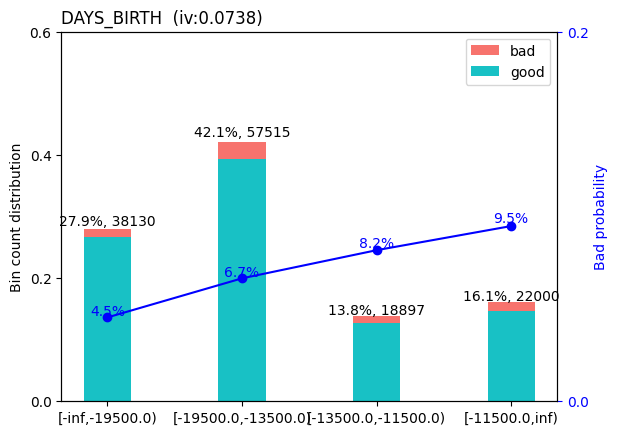

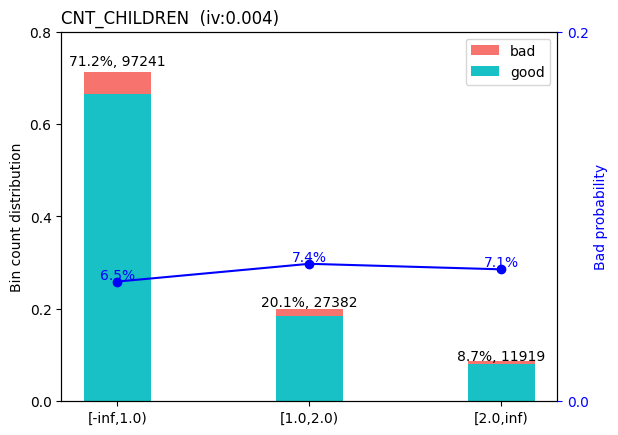

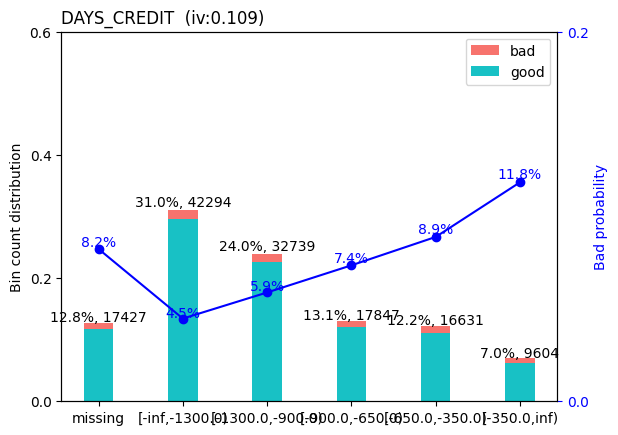

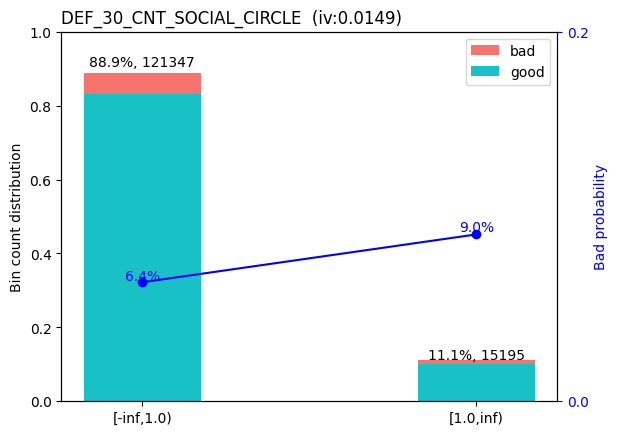

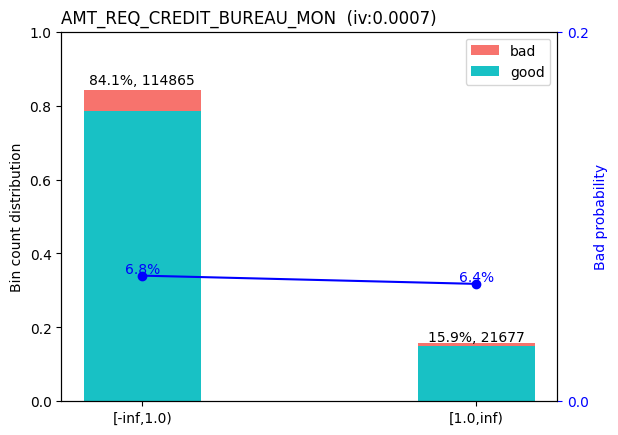

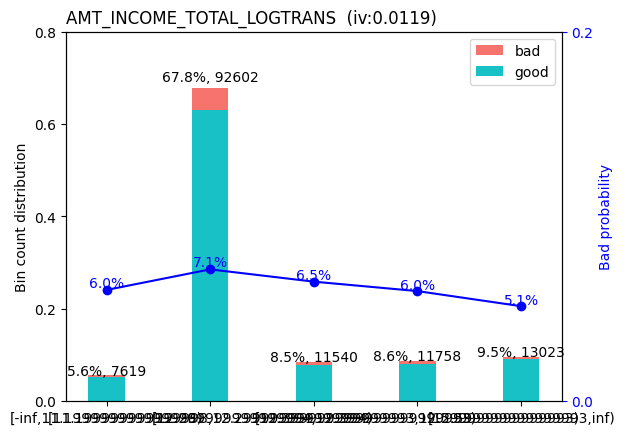

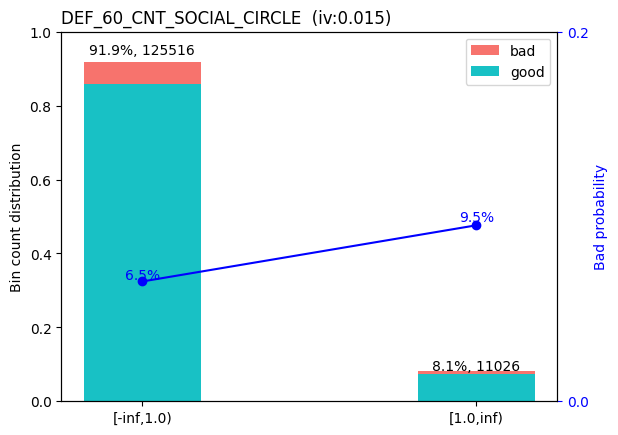

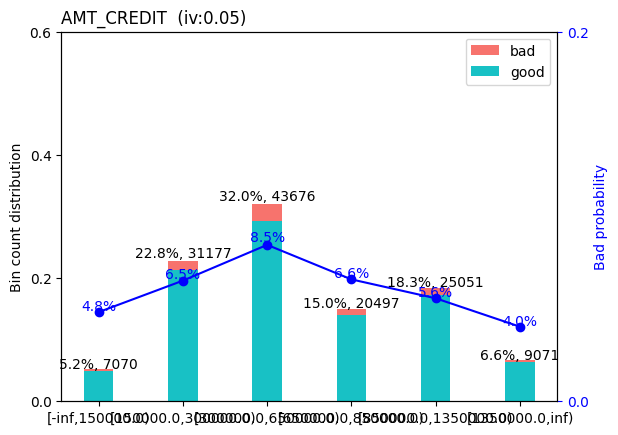

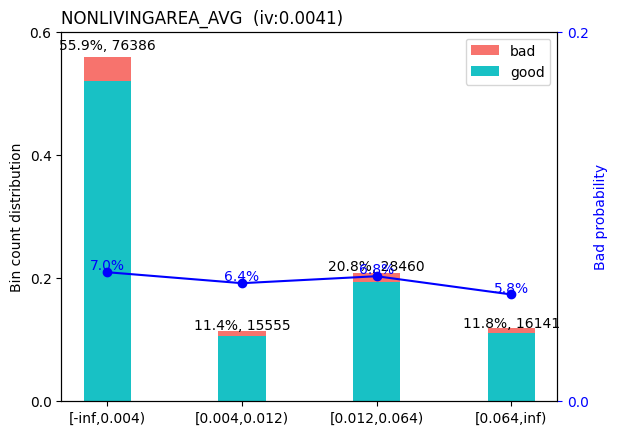

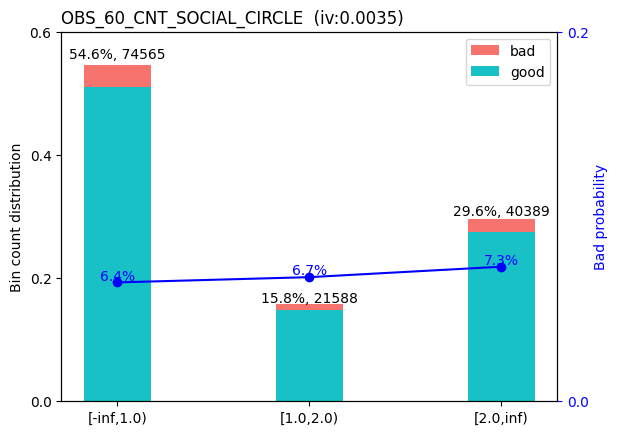

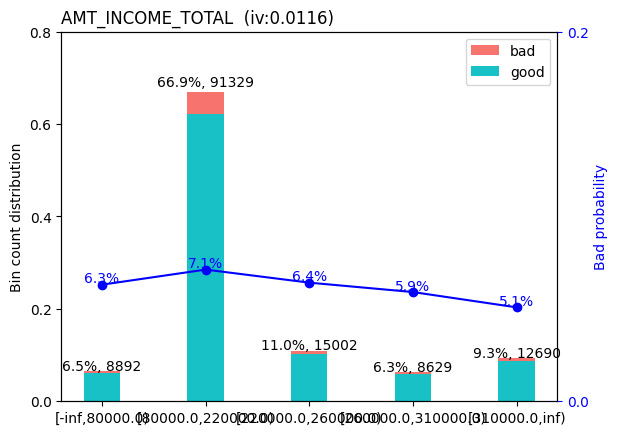

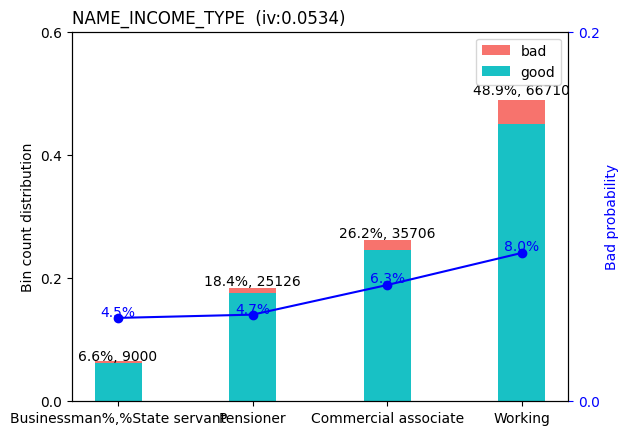

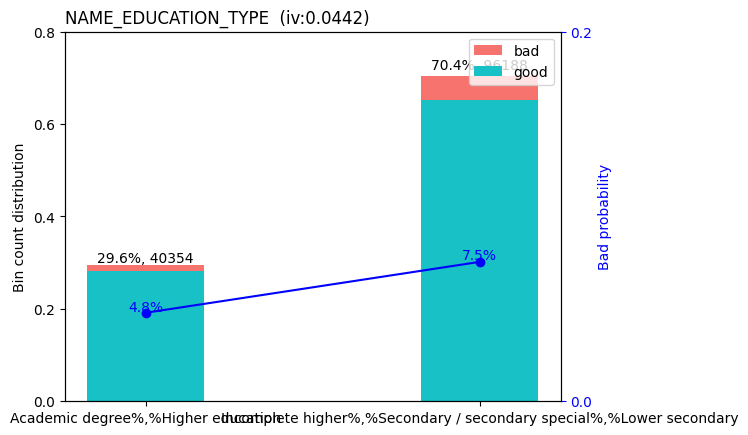

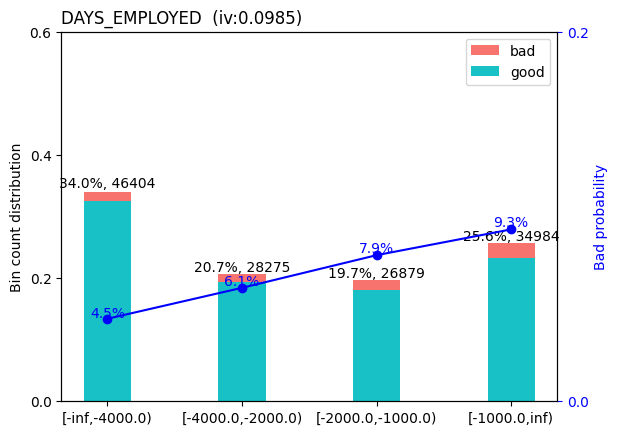

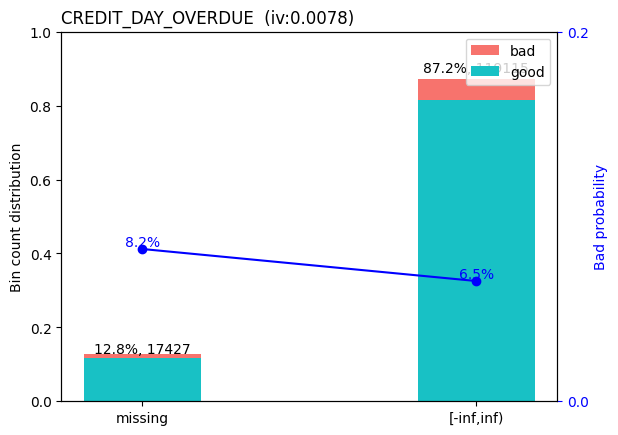

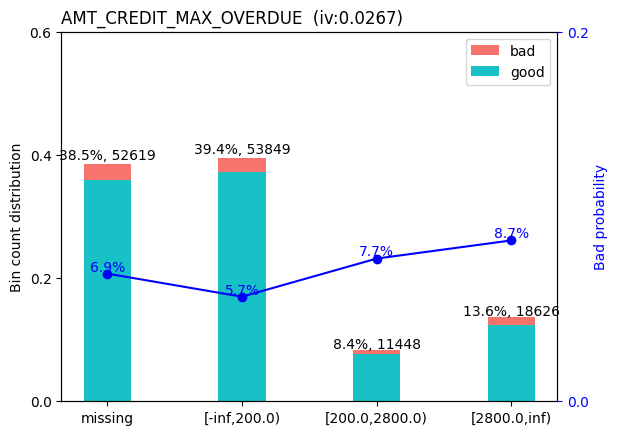

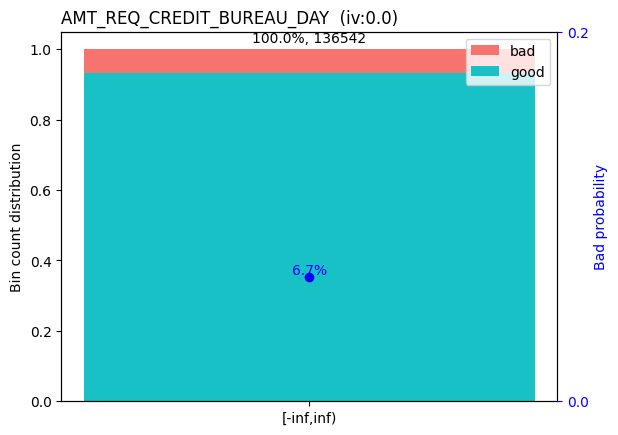

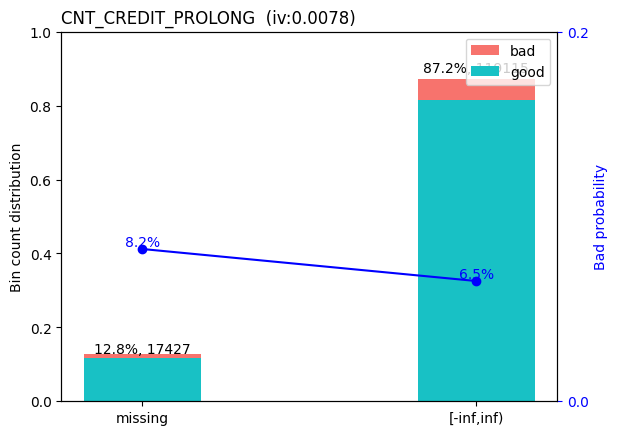

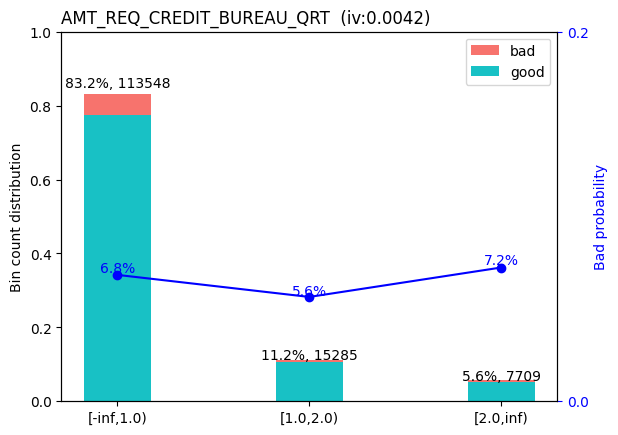

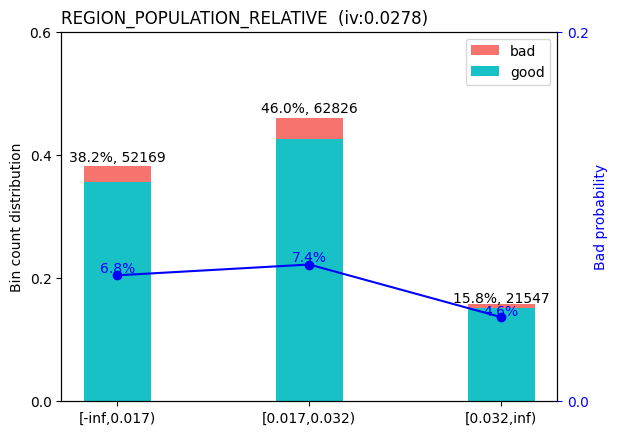

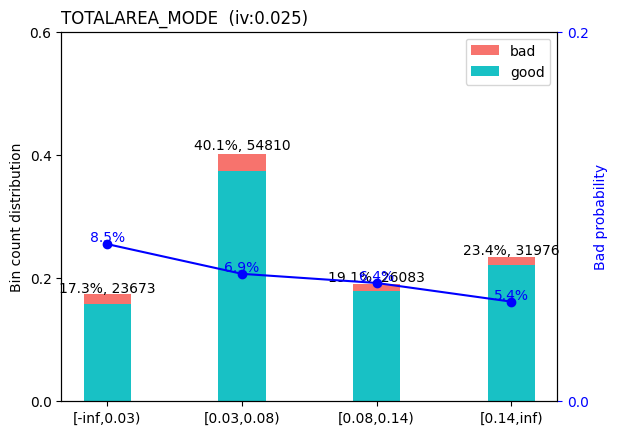

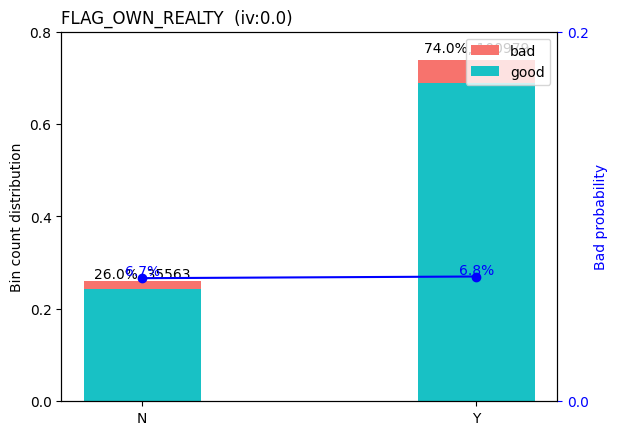

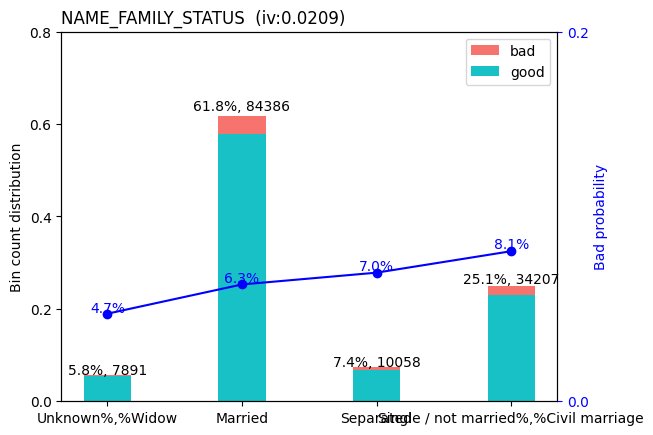

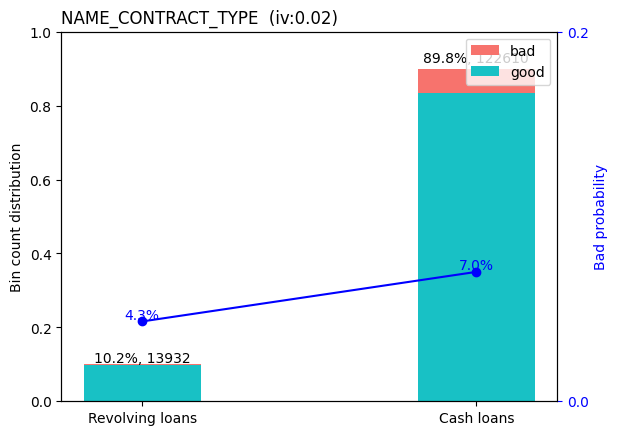

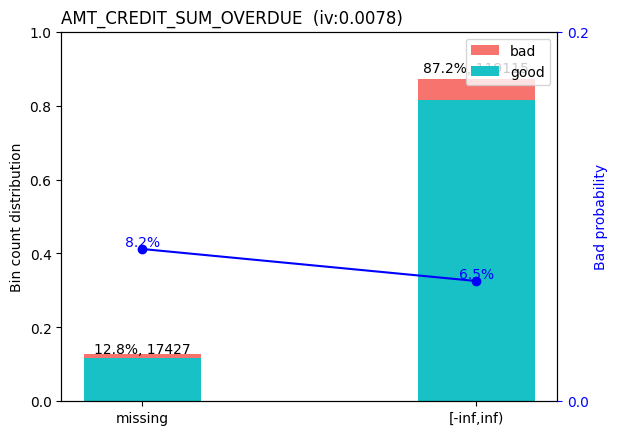

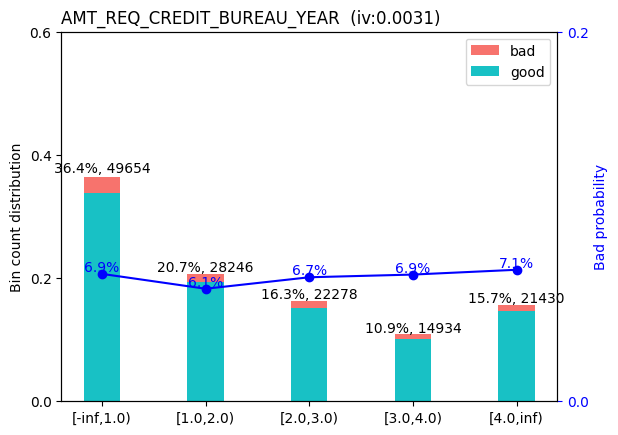

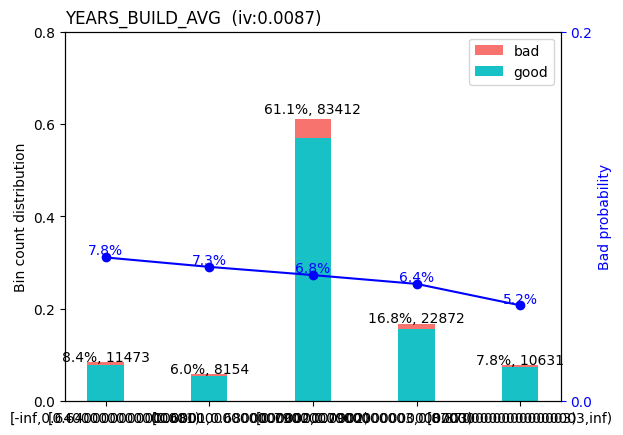

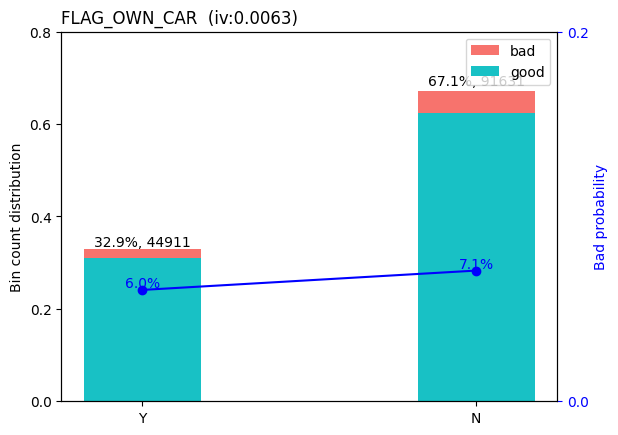

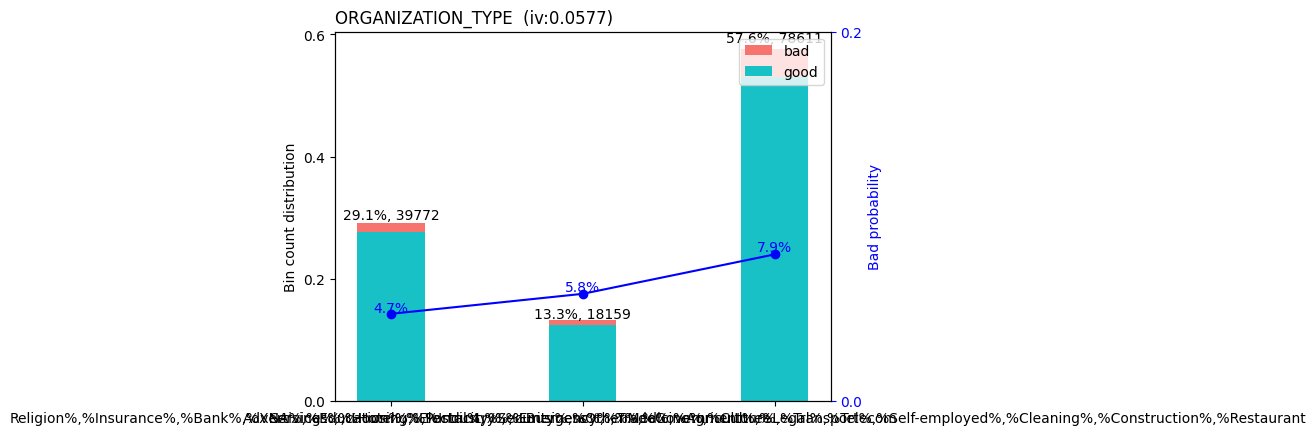

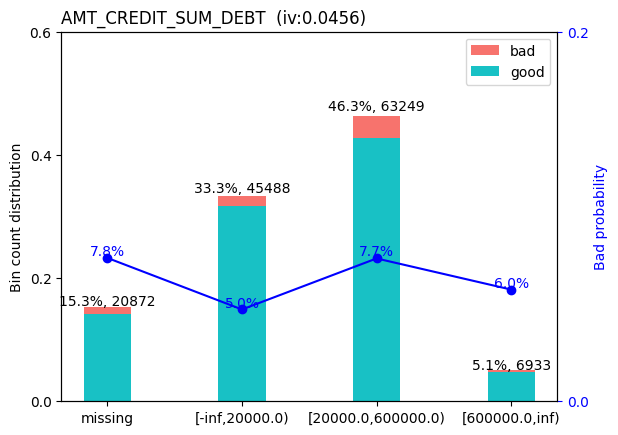

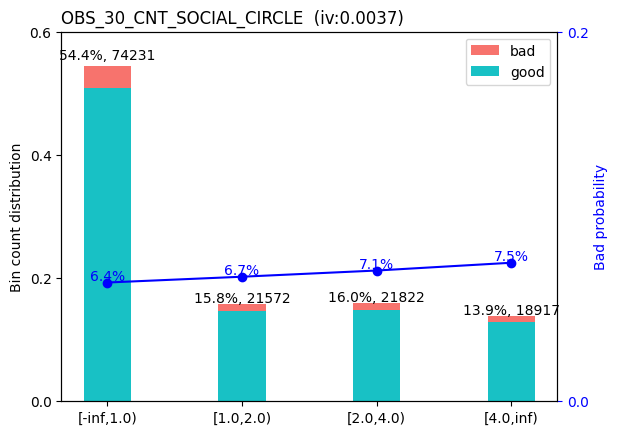

In [114]:
sc.woebin_plot(bins)

## 3.4 Coarse Classing

Manually change bin ranges to make them monotonic


In [115]:
breaks_adj = {
    "REGION_POPULATION_RELATIVE": [0.032],
    "AMT_CREDIT": [600000, 850000, 1350000],
    "AMT_CREDIT_SUM_DEBT": [10000, 100000]
}

new_bins = sc.woebin(new_final_data, y="TARGET", breaks_list=breaks_adj)

[INFO] creating woe binning ...


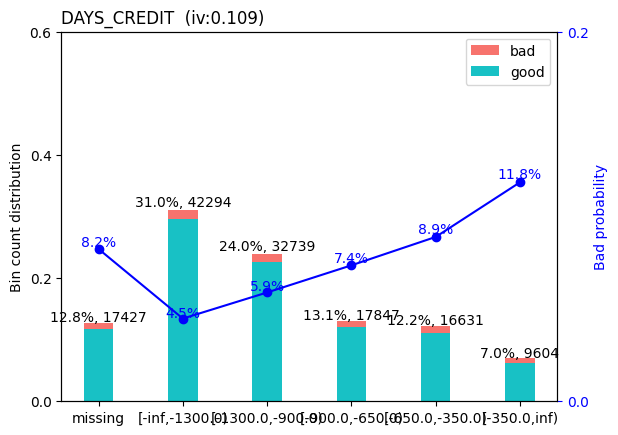

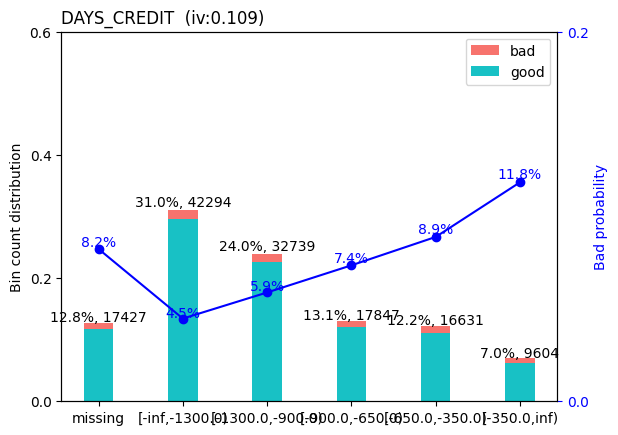

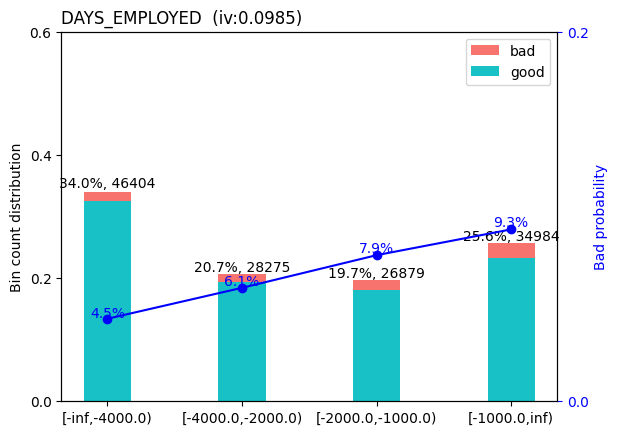

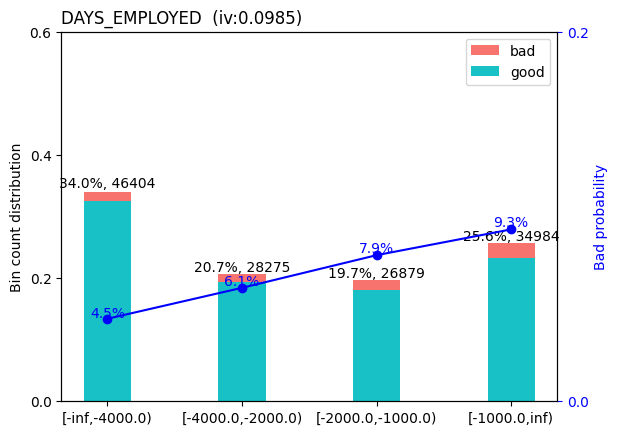

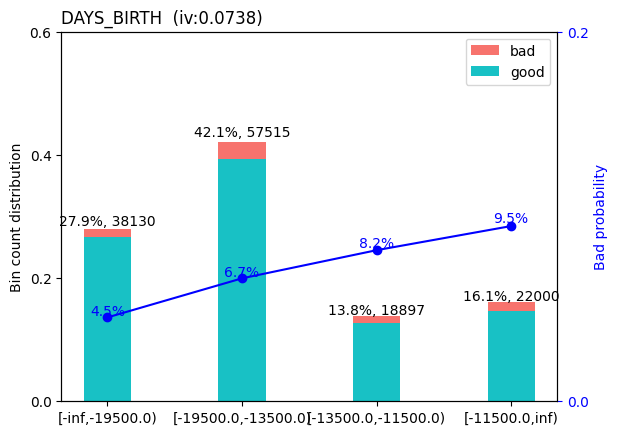

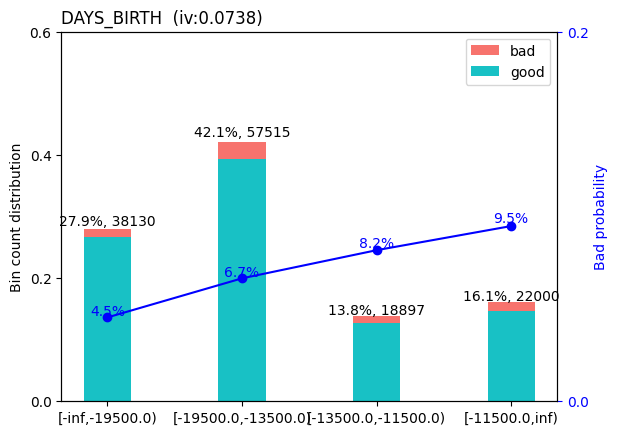

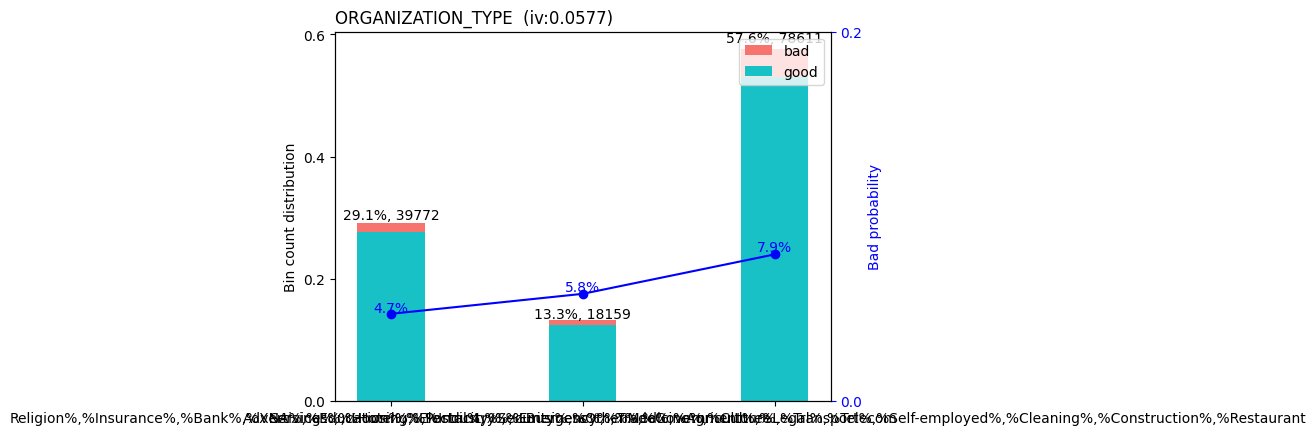

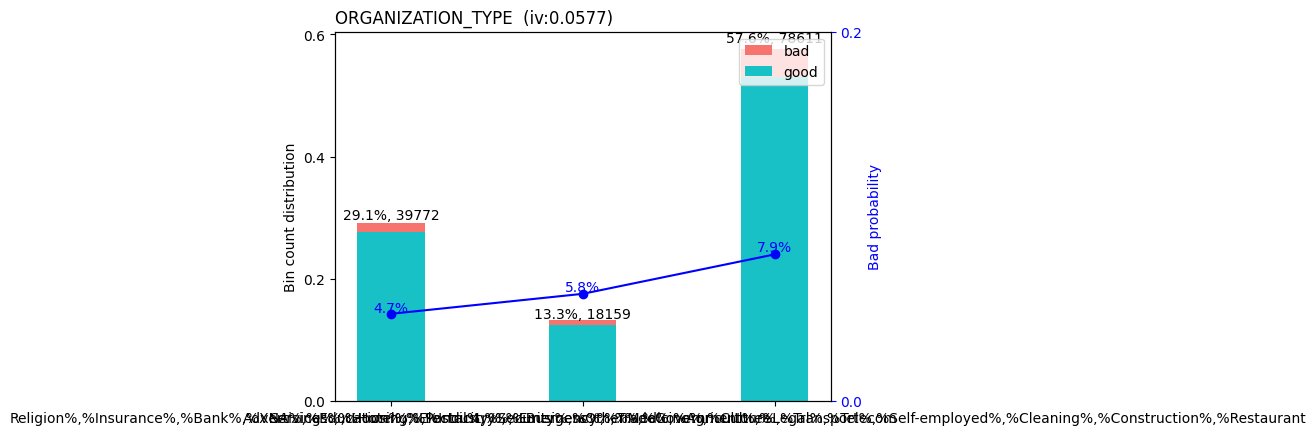

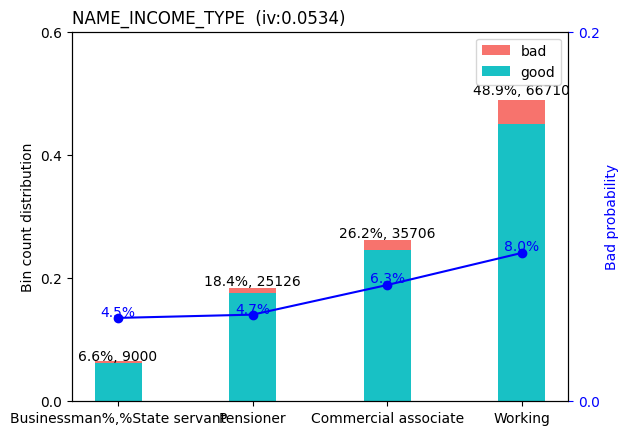

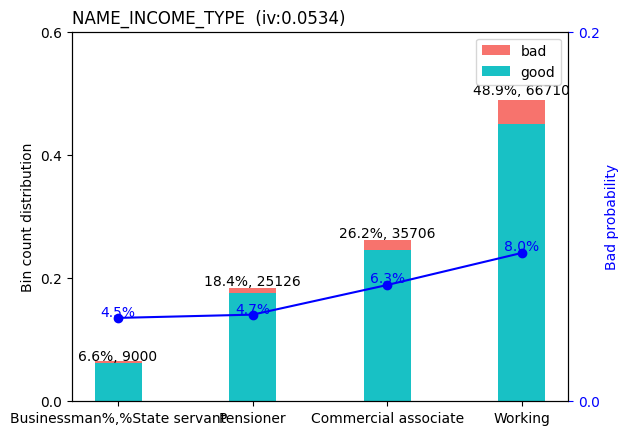

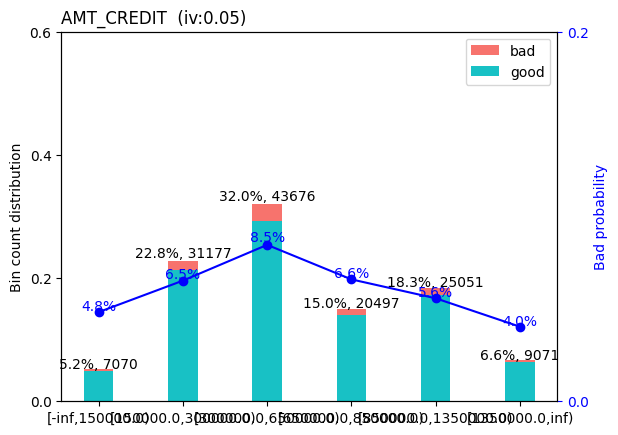

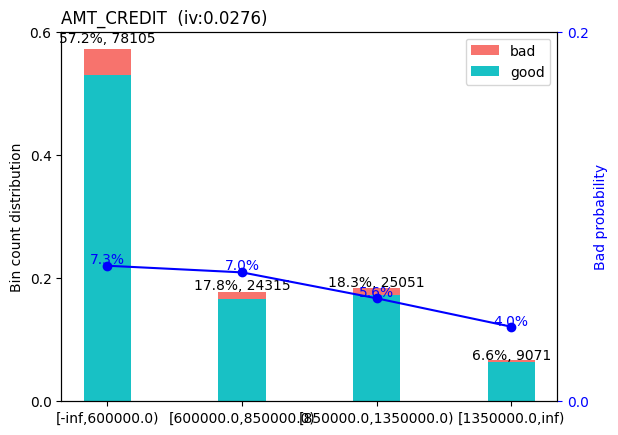

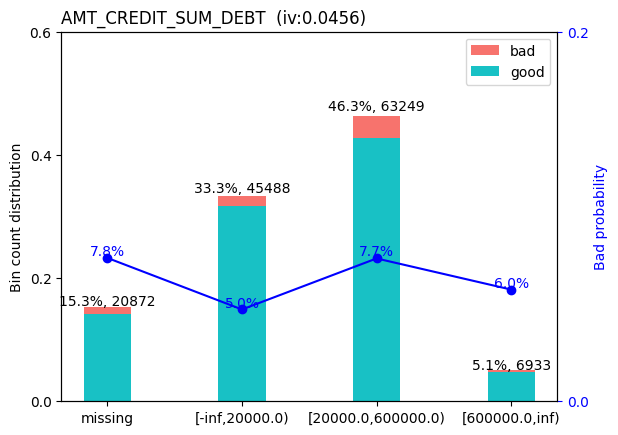

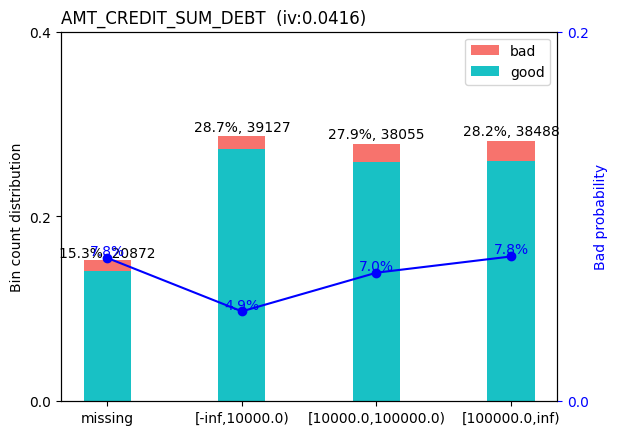

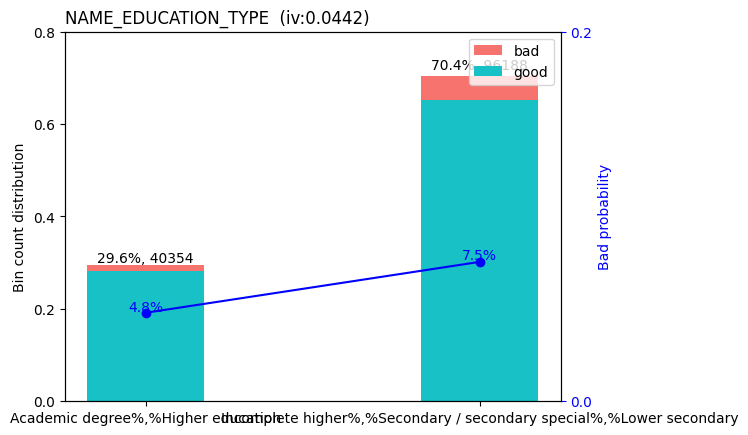

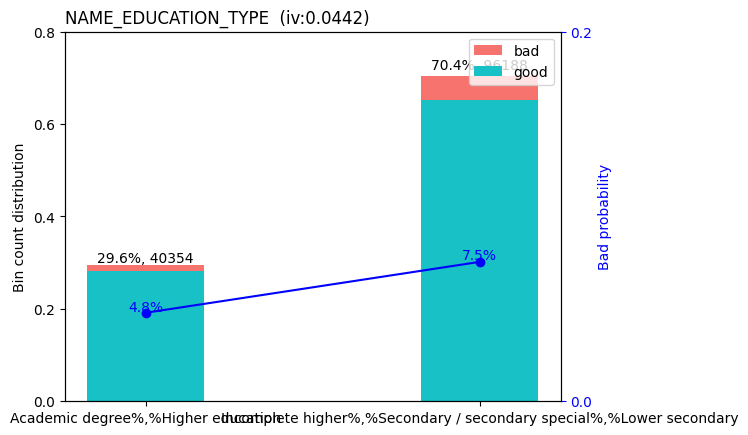

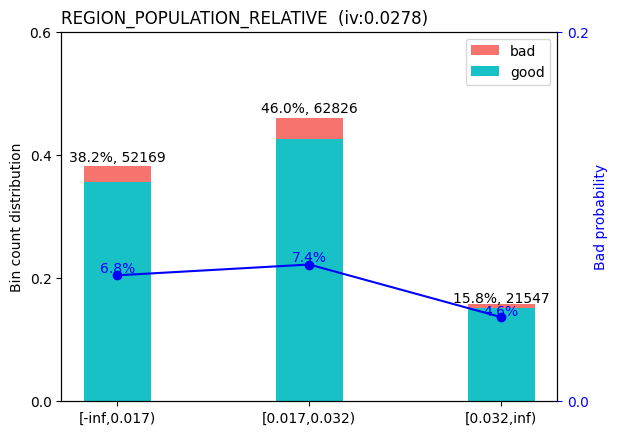

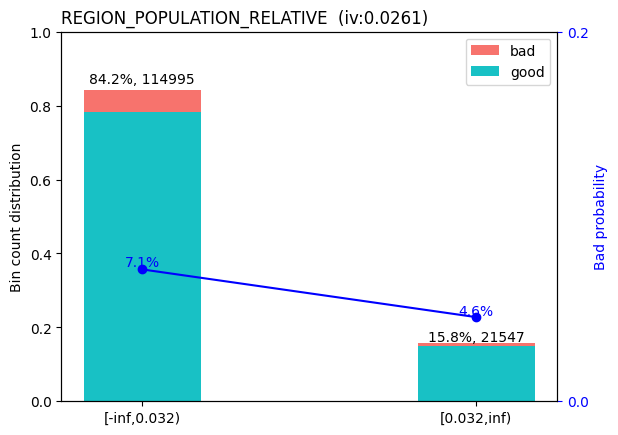

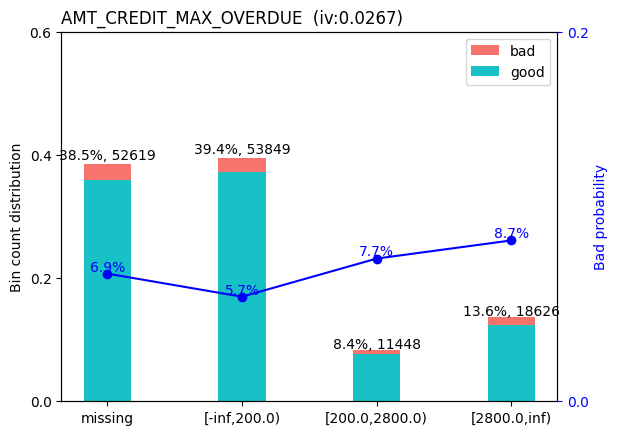

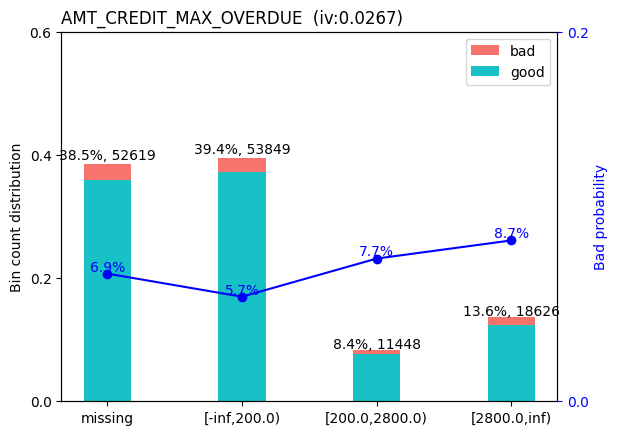

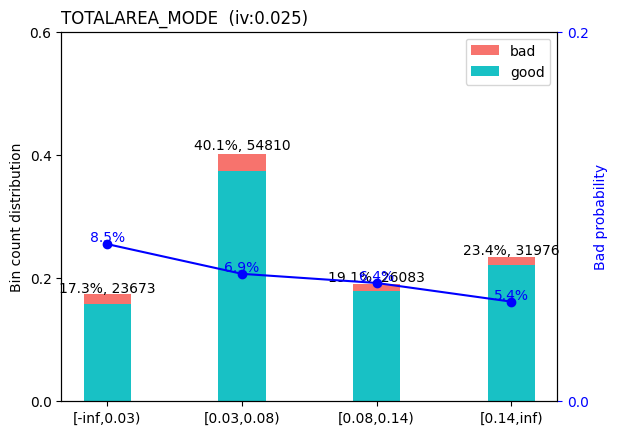

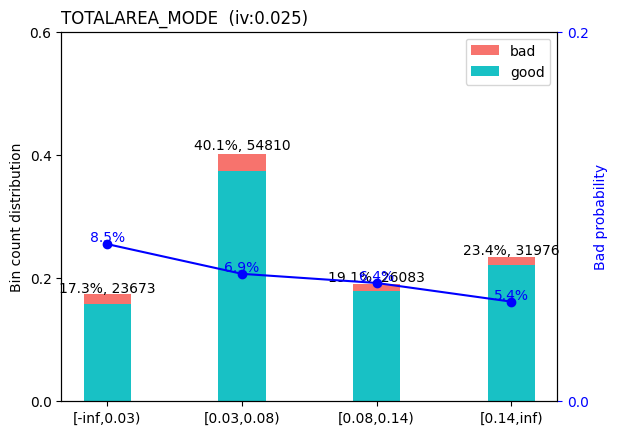

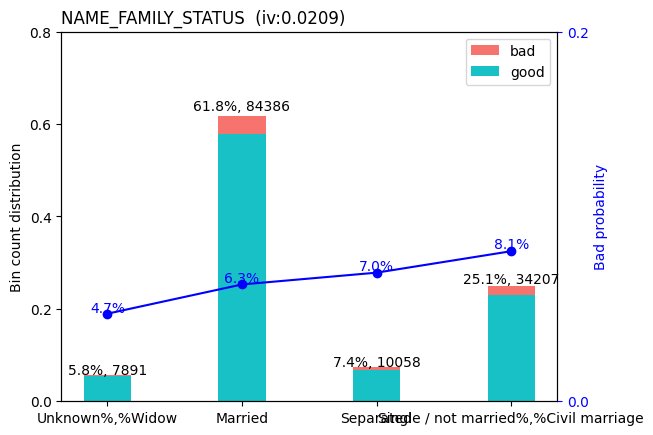

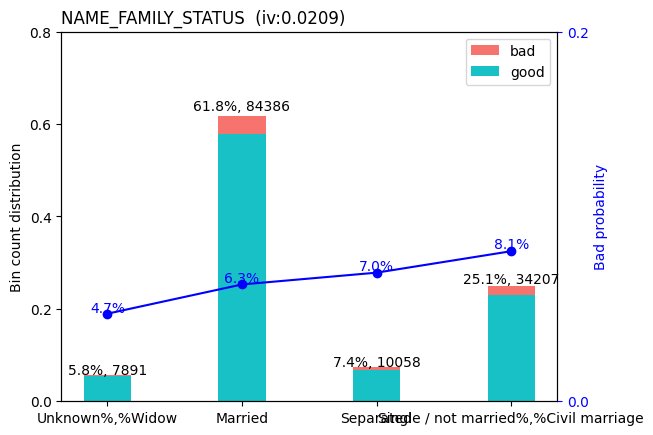

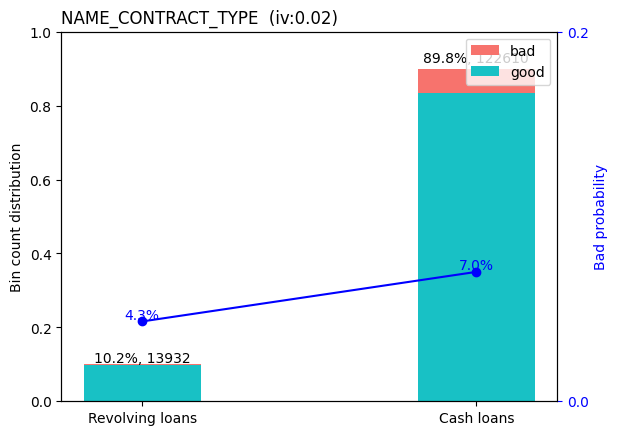

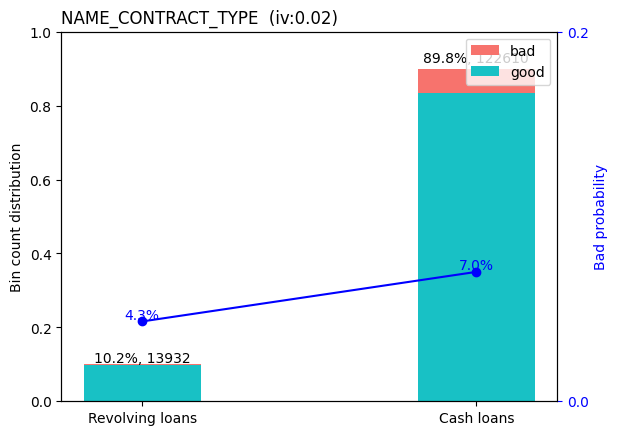

In [116]:
temp_list = col_to_keep_list.copy()
temp_list.remove("TARGET")
for col in temp_list:
    sc.woebin_plot(bins[col])
    sc.woebin_plot(new_bins[col])

# 4.0 Create Scorecard


## 4.1 WOE Encoding


In [117]:
# split data into 70% train and 30% test
train, test = sc.split_df(new_final_data, "TARGET", ratio=0.7).values()
print(train.shape)
print(test.shape)

# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, new_bins)
test_woe = sc.woebin_ply(test, new_bins)
train_woe

(95579, 14)
(40963, 14)
[INFO] converting into woe values ...
[INFO] converting into woe values ...


,TARGET,REGION_POPULATION_RELATIVE_woe,AMT_CREDIT_woe,TOTALAREA_MODE_woe,DAYS_BIRTH_woe,NAME_INCOME_TYPE_woe,NAME_FAMILY_STATUS_woe,ORGANIZATION_TYPE_woe,AMT_CREDIT_SUM_DEBT_woe,NAME_EDUCATION_TYPE_woe,NAME_CONTRACT_TYPE_woe,DAYS_EMPLOYED_woe,DAYS_CREDIT_woe,AMT_CREDIT_MAX_OVERDUE_woe
SK_ID_CURR,,,,,,,,,,,,,,
100002,1,0.063200,0.092855,0.253348,0.373014,0.190746,0.203189,0.179929,0.036084,0.122997,0.042788,0.351811,0.096085,0.148439
100003,0,0.063200,-0.200774,0.026499,-0.012199,-0.423277,-0.066615,-0.373163,-0.343781,-0.360885,0.042788,0.173974,-0.431503,-0.184589
100016,0,0.063200,0.092855,0.026499,0.210505,0.190746,-0.066615,0.179929,0.036084,0.122997,0.042788,-0.097843,0.302423,-0.184589
100017,0,0.063200,-0.200774,-0.235726,-0.012199,0.190746,-0.066615,0.179929,-0.343781,0.122997,0.042788,-0.097843,-0.431503,-0.184589
100022,0,-0.413633,0.092855,0.253348,-0.012199,0.190746,-0.371478,0.179929,0.164377,0.122997,-0.468326,-0.434003,0.622403,-0.184589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,0,0.063200,0.092855,-0.235726,-0.417258,-0.382878,0.203189,-0.373163,0.036084,0.122997,0.042788,-0.434003,-0.431503,0.278725
456252,0,0.063200,0.092855,0.253348,-0.417258,-0.382878,-0.371478,-0.373163,0.153331,0.122997,0.042788,-0.434003,0.219024,0.028304
456253,0,0.063200,0.038671,-0.235726,-0.012199,0.190746,0.036282,-0.373163,0.164377,-0.360885,0.042788,-0.434003,0.096085,0.028304


## 4.2 LR Model Training

In [118]:
# create the X, y parts of data for train and test
y_train = train_woe.loc[:, "TARGET"]
X_train = train_woe.loc[:, train_woe.columns != "TARGET"]
y_test = test_woe.loc[:, "TARGET"]
X_test = test_woe.loc[:, train_woe.columns != "TARGET"]

# create a logistic regression model object
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[0.78556047 0.7245426  0.76681567 0.35167995 0.04173698 0.52206888
  0.42902569 0.71937084 1.00961537 1.23583019 0.56435877 0.74565342
  1.22767593]]
[-2.63168286]


## 4.3 Scorecard Generation


In [119]:
# generate a card from the model and bins. The scores will be based on probability of default from the model
card = sc.scorecard(
    new_bins, lr, X_train.columns, points0=600, odds0=1 / 40, pdo=20, basepoints_eq0=True
)

pprint.pprint(card)

{'AMT_CREDIT':      variable                   bin  points
2  AMT_CREDIT       [-inf,600000.0)    42.0
3  AMT_CREDIT   [600000.0,850000.0)    43.0
4  AMT_CREDIT  [850000.0,1350000.0)    48.0
5  AMT_CREDIT       [1350000.0,inf)    55.0,
 'AMT_CREDIT_MAX_OVERDUE':                   variable             bin  points
43  AMT_CREDIT_MAX_OVERDUE         missing    43.0
44  AMT_CREDIT_MAX_OVERDUE    [-inf,200.0)    50.0
45  AMT_CREDIT_MAX_OVERDUE  [200.0,2800.0)    39.0
46  AMT_CREDIT_MAX_OVERDUE    [2800.0,inf)    34.0,
 'AMT_CREDIT_SUM_DEBT':                variable                 bin  points
25  AMT_CREDIT_SUM_DEBT             missing    41.0
26  AMT_CREDIT_SUM_DEBT      [-inf,10000.0)    51.0
27  AMT_CREDIT_SUM_DEBT  [10000.0,100000.0)    43.0
28  AMT_CREDIT_SUM_DEBT      [100000.0,inf)    40.0,
 'DAYS_BIRTH':       variable                  bin  points
10  DAYS_BIRTH      [-inf,-19500.0)    48.0
11  DAYS_BIRTH  [-19500.0,-13500.0)    44.0
12  DAYS_BIRTH  [-13500.0,-11500.0)    42.0
13  D

# 5.0 Analysis and Tuning

Confusion matrix, classification report, ROC curve and AUC


Text(0.5, 1.0, 'test data scores')

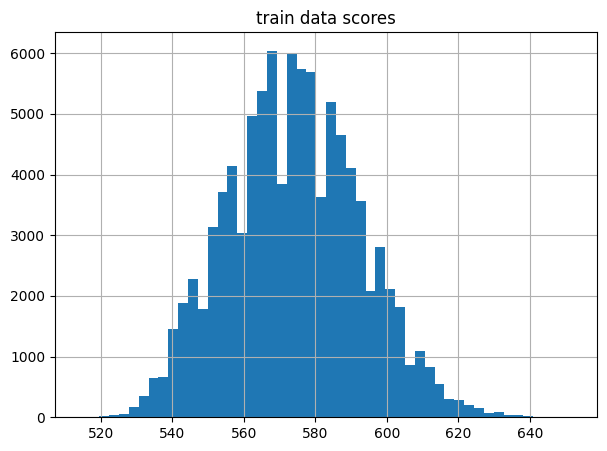

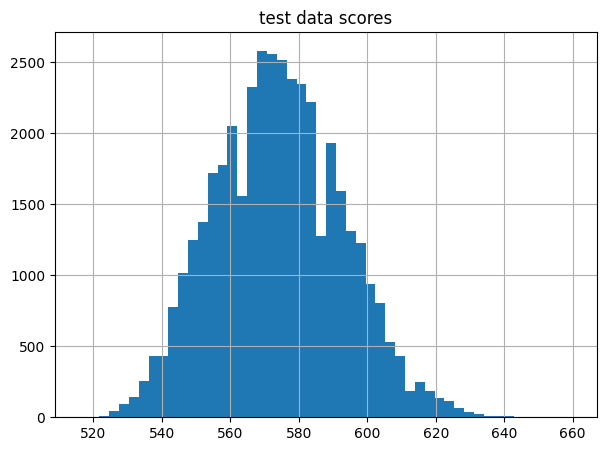

In [120]:
# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

# distrubution of scores on test data
train_score.hist(figsize=(7, 5), bins=50)
plt.title("train data scores")
test_score.hist(figsize=(7, 5), bins=50)
plt.title("test data scores")

In [121]:
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))

Confusion matrix:
[[38207  2756]
 [    0     0]]

PCC measures:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     40963
           1       0.00      0.00      0.00         0

    accuracy                           0.93     40963
   macro avg       0.50      0.47      0.48     40963
weighted avg       1.00      0.93      0.97     40963



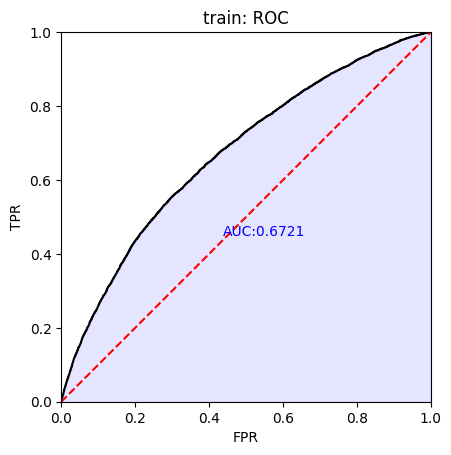

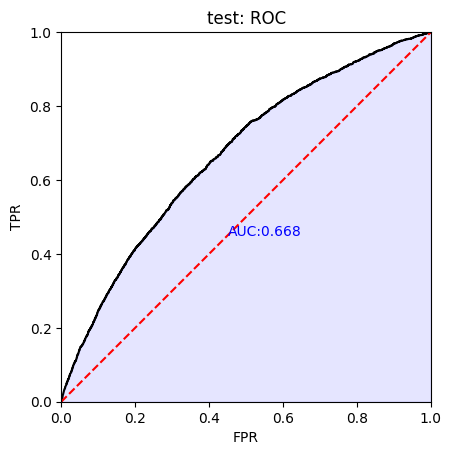

In [122]:
# evaluate the performance of the logistic regression
train_pred = lr.predict_proba(X_train)[:, 1]
test_pred = lr.predict_proba(X_test)[:, 1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type=["roc"], title="train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type=["roc"], title="test")

In [123]:
# Evaluate performance of scorecard: Verify if scorecard's default rate is similar to 1:40 odds

test_scores2 = test[['TARGET']]
test_scores2['score'] = sc.scorecard_ply(test, card)['score']
test_scores2 = test_scores2[test_scores2['score'] >= 600]
test_scores2['TARGET'].value_counts()

# Verify if default rate of test set is similar to 1:40 odds

print("Odds used to generate scorecard: 1 : 40")
print("Odds of default in test set: 1 : ", test_scores2['TARGET'].value_counts()[0] / test_scores2['TARGET'].value_counts()[1])

Odds used to generate scorecard: 1 : 40
Odds of default in test set: 1 :  45.0


## 5.1 Benchmarking with Random Forest Classifier



In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
import statistics


X = train_woe.drop("TARGET", axis=1)
y = train_woe["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# Instantiate the model object
model = RandomForestClassifier(random_state=5, max_depth =7, n_estimators = 400)

# Fit the model with the training data
model.fit(X_train, y_train)
print('Number of Trees used : ', model.n_estimators) # Find out number of trees used

# Predict the target on the test dataset
y_predict = model.predict(X_test)
print('\nPrediction on test data', y_predict) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)

Number of Trees used :  400

Prediction on test data [0 0 0 ... 0 0 0]

Accuracy_score on test dataset :  0.9335983818093045


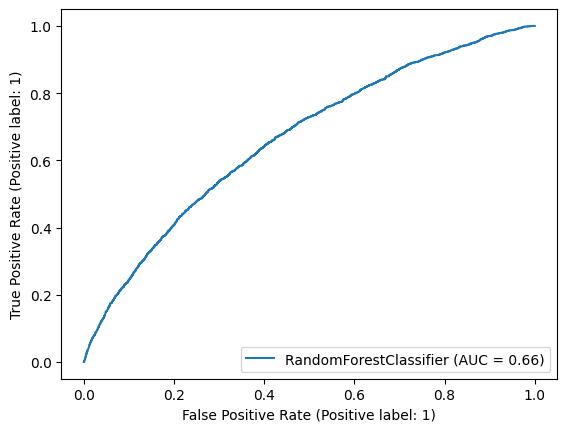

In [125]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [126]:
from catboost import CatBoostClassifier


X = train_woe.drop("TARGET", axis=1)
y = train_woe["TARGET"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# Instantiate the model object
model = CatBoostClassifier(random_seed=5)

# Fit the model with the training data
model.fit(X_train, y_train)  # set verbose=False if you find the logs too long

# Predict the target on the test dataset
y_predict = model.predict(X_test)
print('\nPrediction on test data', y_predict) 

# Accuracy Score on test dataset
accuracy_test = metrics.accuracy_score(y_test, y_predict)
print('\nAccuracy_score on test dataset : ', accuracy_test)

Learning rate set to 0.062002
0:	learn: 0.6250260	total: 4.68ms	remaining: 4.67s
1:	learn: 0.5674943	total: 9.02ms	remaining: 4.5s
2:	learn: 0.5180502	total: 16.3ms	remaining: 5.41s
3:	learn: 0.4753149	total: 22.6ms	remaining: 5.62s
4:	learn: 0.4405312	total: 27.6ms	remaining: 5.49s
5:	learn: 0.4108668	total: 32.9ms	remaining: 5.46s
6:	learn: 0.3847699	total: 39.1ms	remaining: 5.55s
7:	learn: 0.3635375	total: 45.1ms	remaining: 5.59s
8:	learn: 0.3451471	total: 51.1ms	remaining: 5.62s
9:	learn: 0.3299871	total: 57.3ms	remaining: 5.67s
10:	learn: 0.3171280	total: 62.5ms	remaining: 5.62s
11:	learn: 0.3060464	total: 67.3ms	remaining: 5.54s
12:	learn: 0.2964850	total: 73.6ms	remaining: 5.59s
13:	learn: 0.2883666	total: 78.5ms	remaining: 5.53s
14:	learn: 0.2813640	total: 85ms	remaining: 5.58s
15:	learn: 0.2752013	total: 90.6ms	remaining: 5.57s
16:	learn: 0.2699858	total: 97.3ms	remaining: 5.62s
17:	learn: 0.2654654	total: 103ms	remaining: 5.64s
18:	learn: 0.2616501	total: 110ms	remaining: 5.6

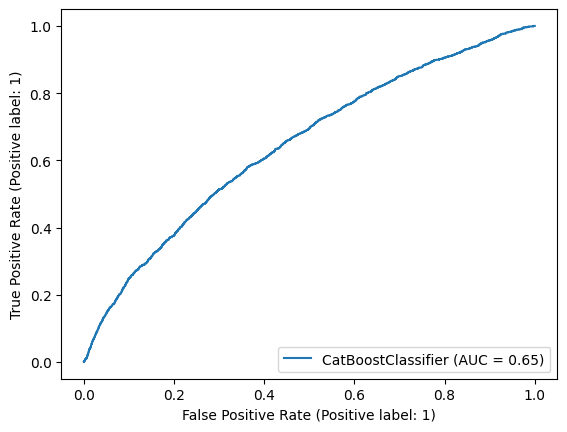

In [127]:
RocCurveDisplay.from_estimator(model, X_test, y_test)